# CROSSOVER SMA

In [453]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import warnings
import scipy.stats as stats
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.offline as pyo
from scipy.stats import skew, kurtosis, shapiro

In [454]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('default')
sns.set_palette("husl")

print("Libraries imported successfully!")
print("loading data ")

df = pd.read_csv("NIFTY 50_minute_data.csv", index_col=0, parse_dates=True)


print("record loaded")
print(df.head())

Libraries imported successfully!
loading data 
record loaded
                    Open     High      Low    Close  volume
DateTime                                                   
09-01-2015 9.15  8285.45  8295.90  8285.45  8292.10       0
09-01-2015 9.16  8292.60  8293.60  8287.20  8288.15       0
09-01-2015 9.17  8287.40  8293.90  8287.40  8293.90       0
09-01-2015 9.18  8294.25  8300.65  8293.90  8300.65       0
09-01-2015 9.19  8300.60  8301.30  8298.75  8301.20       0


In [455]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 932946 entries, 09-01-2015 9.15 to 07-02-2025 15.29
Data columns (total 5 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Open    932946 non-null  float64
 1   High    932946 non-null  float64
 2   Low     932946 non-null  float64
 3   Close   932946 non-null  float64
 4   volume  932946 non-null  int64  
dtypes: float64(4), int64(1)
memory usage: 42.7+ MB


In [456]:
df.isnull().sum()

Open      0
High      0
Low       0
Close     0
volume    0
dtype: int64

In [457]:
df['SMA_50'] = df['Close'].rolling(window=50).mean()
df['SMA_200'] = df['Close'].rolling(window=200).mean()


<Axes: xlabel='DateTime'>

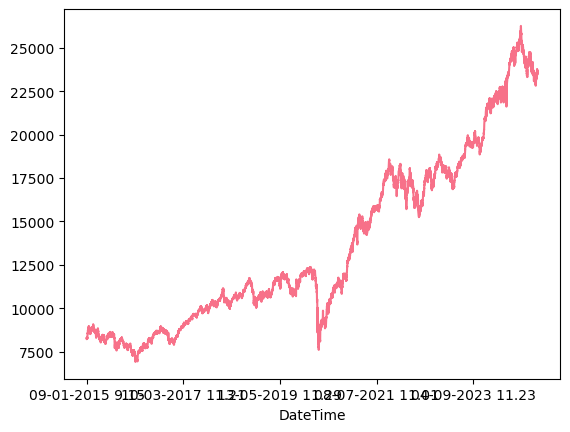

In [458]:
df['SMA_50'].plot()

<Axes: xlabel='DateTime'>

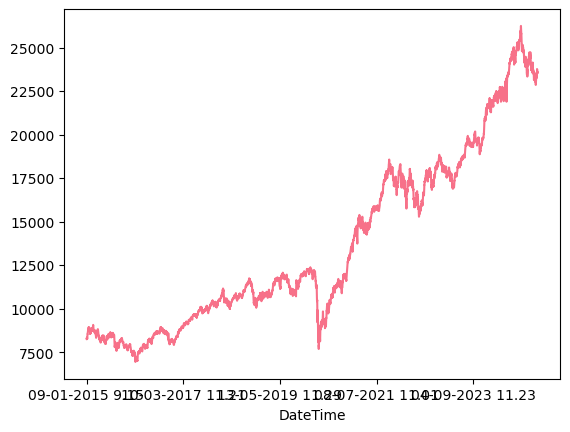

In [459]:


df['SMA_200'].plot()

# perprocsiing 

In [460]:
df = pd.read_csv("NIFTY 50_minute_data.csv", parse_dates=True)

df['DateTime'] = pd.to_datetime(df['DateTime'], format='%d-%m-%Y %H.%M')
df.set_index('DateTime', inplace=True)

df = df.between_time('09:15', '15:30')

# 2. Filter to last calendar year (2024)

In [461]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 932334 entries, 2015-01-09 09:15:00 to 2025-02-07 15:29:00
Data columns (total 5 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Open    932334 non-null  float64
 1   High    932334 non-null  float64
 2   Low     932334 non-null  float64
 3   Close   932334 non-null  float64
 4   volume  932334 non-null  int64  
dtypes: float64(4), int64(1)
memory usage: 42.7 MB


In [462]:
# Filter to last calendar year (2024)
df.index = pd.to_datetime(df.index)
last_year = 2024
df_last = df[df.index.year == last_year]

<Axes: xlabel='DateTime'>

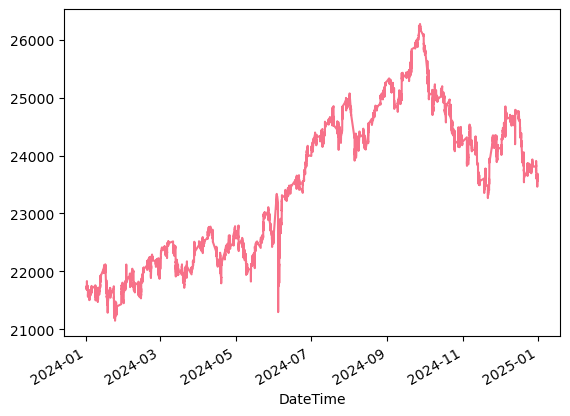

In [463]:
df_last['Open'].plot()

In [464]:
from matplotlib.backends.backend_pdf import PdfPages
pdf = PdfPages('nifty_2024_report.pdf')

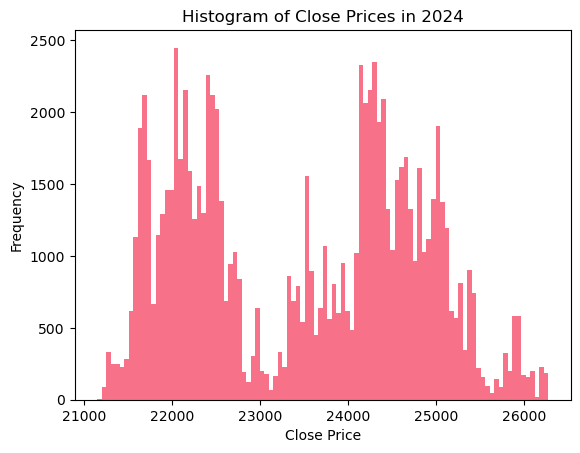

In [465]:
# 3. Plot 1: Histogram of Close Prices (2024)
plt.figure()
plt.hist(df_last['Close'], bins=100)
plt.title(f'Histogram of Close Prices in {last_year}')
plt.xlabel('Close Price')
plt.ylabel('Frequency')

pdf.savefig();
plt.show()
plt.close()
warnings.filterwarnings('ignore')

# 4. Plot 2: Boxplot of Close by Month in 2024

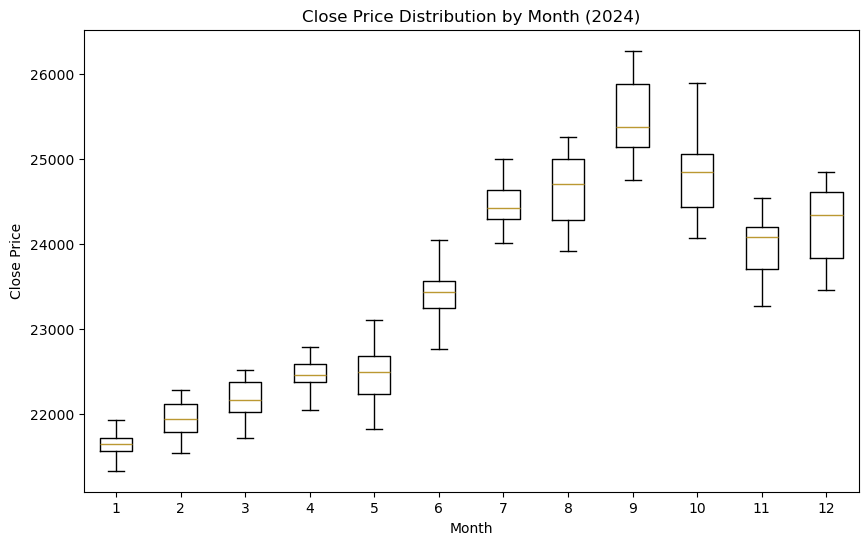

In [466]:

df_last['Month'] = df_last.index.month
plt.figure(figsize=(10,6))
data_by_month = [df_last[df_last['Month']==m]['Close'].values for m in range(1,13)]
plt.boxplot(data_by_month, labels=list(range(1,13)), showfliers=False)
plt.title(f'Close Price Distribution by Month ({last_year})')
plt.xlabel('Month')
plt.ylabel('Close Price')

pdf.savefig();
plt.show()
plt.close()

# 5. Plot 3: Rolling Volatility (30‑minute window)

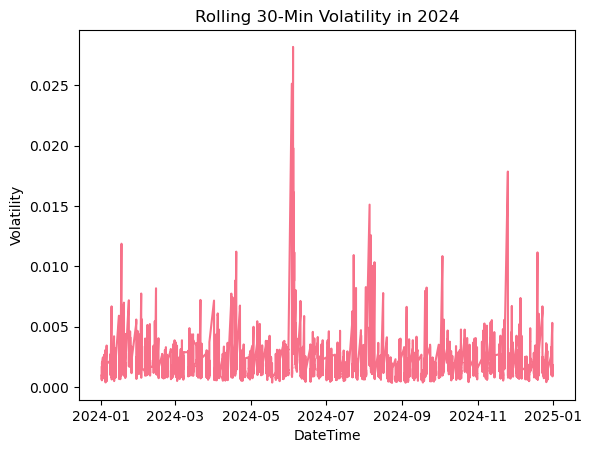

In [467]:

df_last['Return'] = df_last['Close'].pct_change()
df_last['Vol30'] = df_last['Return'].rolling(window=30).std() * (30**0.5)
plt.figure()
plt.plot(df_last.index, df_last['Vol30'])
plt.title(f'Rolling 30‑Min Volatility in {last_year}')
plt.xlabel('DateTime')
plt.ylabel('Volatility')
pdf.savefig();
plt.show()
plt.close()

 Plot 4: Heatmap of Average Return by Time of Day

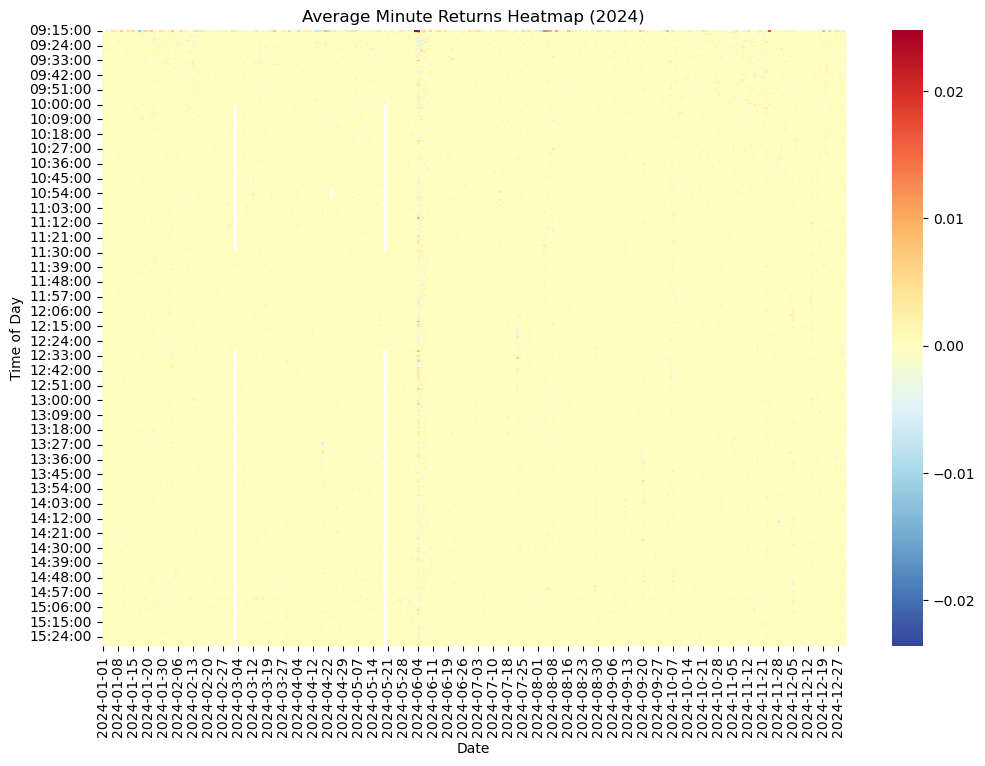

In [468]:
pivot = df_last['Return'].groupby([df_last.index.time, df_last.index.date]).mean().unstack()
plt.figure(figsize=(12,8))
import seaborn as sns
sns.heatmap(pivot, cmap='RdYlBu_r', center=0)
plt.title(f'Average Minute Returns Heatmap ({last_year})')
plt.xlabel('Date')
plt.ylabel('Time of Day')
pdf.savefig();
plt.show()
plt.close()

 Plot 5: OHLC Candlestick for a Sample Month

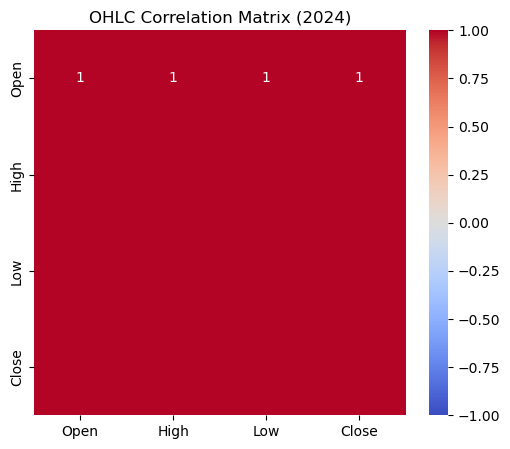

In [469]:

ohlc = df_last[['Open','High','Low','Close']]
corr = ohlc.corr()
plt.figure(figsize=(6,5))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title(f'OHLC Correlation Matrix ({last_year})')
pdf.savefig();
plt.show()
plt.close()

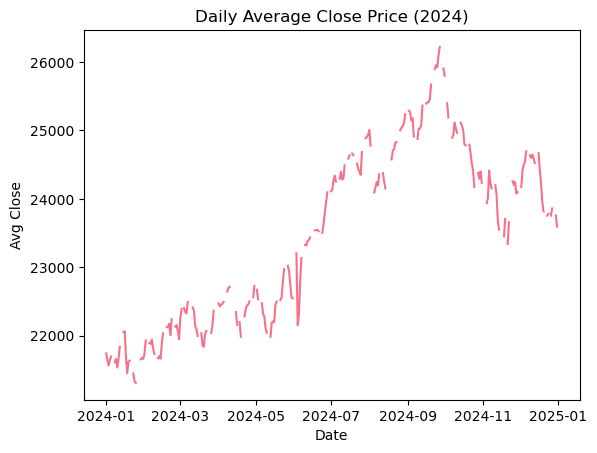

In [470]:
daily_avg = df_last['Close'].resample('D').mean()
plt.figure()
plt.plot(daily_avg.index, daily_avg.values)
plt.title(f'Daily Average Close Price ({last_year})')
plt.xlabel('Date')
plt.ylabel('Avg Close')
pdf.savefig();
plt.show()
plt.close()


In [471]:

print('Report saved as nifty_2024_report.pdf')

Report saved as nifty_2024_report.pdf


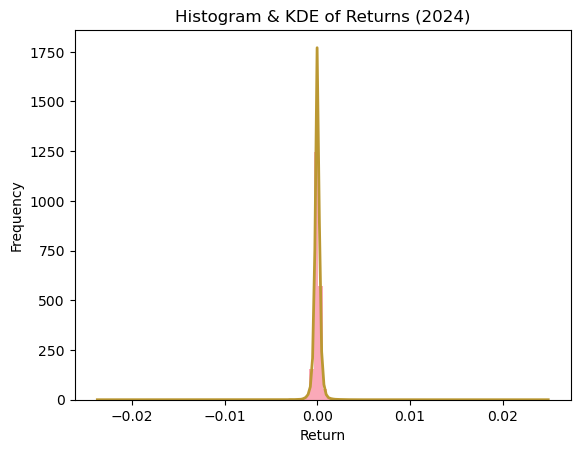

In [472]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
df_last['Return'].plot(kind='hist', bins=100, density=True, alpha=0.6)
sns.kdeplot(df_last['Return'], lw=2)
plt.title('Histogram & KDE of Returns (2024)')
pdf.savefig();
plt.show() 
plt.close()

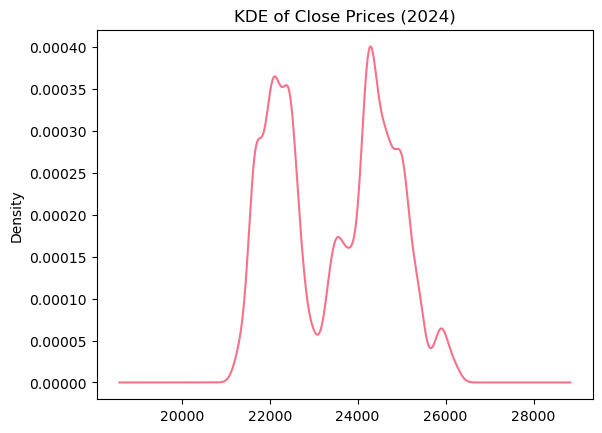

In [473]:
# Plot 2: KDE of Close Prices
df_last['Close'].plot(kind='kde')
plt.title('KDE of Close Prices (2024)')
pdf.savefig();
plt.show()
plt.close()

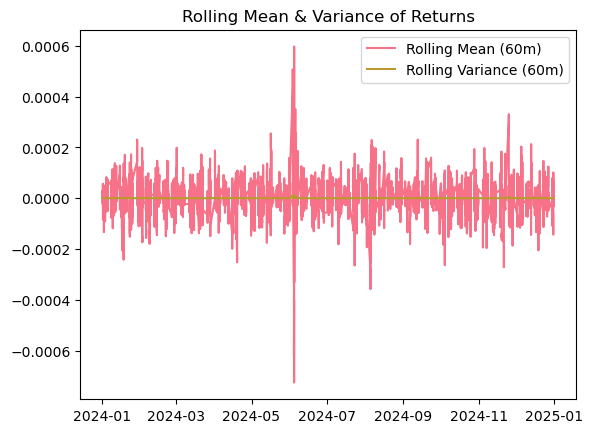

In [474]:

# Plot 4: Rolling Mean & Variance of Returns
rolling = df_last['Return'].rolling(window=60)
plt.figure()
plt.plot(rolling.mean(), label='Rolling Mean (60m)')
plt.plot(rolling.var(), label='Rolling Variance (60m)')
plt.legend(); plt.title('Rolling Mean & Variance of Returns')
pdf.savefig();
plt.show()
plt.close()

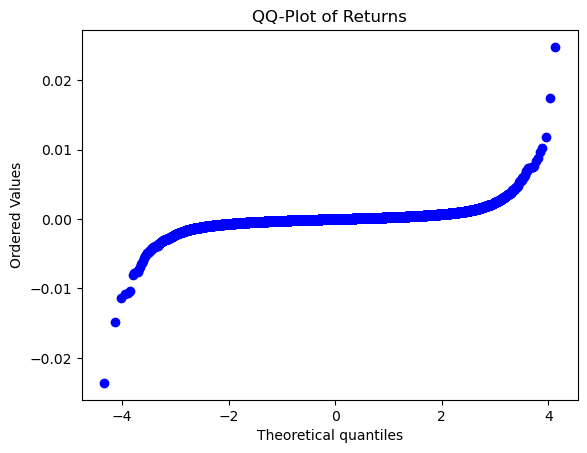

In [475]:

# Plot 6: QQ-Plot of Returns
plt.figure(); stats.probplot(df_last['Return'], dist='norm', plot=plt)
plt.title('QQ-Plot of Returns'); pdf.savefig(); plt.show(); plt.close()

# SMA MODELING

In [476]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import warnings
import scipy.stats as stats
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.offline as pyo
from scipy.stats import skew, kurtosis, shapiro,jarque_bera
warnings.filterwarnings('ignore')

# Set style for matplotlib
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

In [480]:
class NiftyBacktester:
    """
    Comprehensive SMA Backtesting Class for NIFTY 50 Minute Data
    """
    
    def __init__(self, data_file='NIFTY 50_minute_data.csv', transaction_cost=0.00015):
        """
        Initialize the backtester
        
        Parameters:
        data_file: str, path to the CSV file
        transaction_cost: float, transaction cost per trade (default 0.015%)
        """
        self.data_file = data_file
        self.transaction_cost = transaction_cost
        self.sma_periods = [5, 10, 20, 50, 100, 200]
        self.results = {}
        self.best_sma = None
        
    def load_and_prepare_data(self):
        """Load and prepare the NIFTY 50 minute data"""
        print("Loading NIFTY 50 minute data...")
        
        df = pd.read_csv("NIFTY 50_minute_data.csv", parse_dates=True)
        df['DateTime'] = pd.to_datetime(df['DateTime'], format='%d-%m-%Y %H.%M')
        df.set_index('DateTime', inplace=True)
        self.df = df 
        print(f"Data loaded: {len(self.df)} records from {self.df.index[0]} to {self.df.index[-1]}")
        print(f"Data shape: {self.df.shape}")
        print(f"\nData types:")
        print(self.df.dtypes)
        print(f"\nData info:")
        print(self.df.describe())
        
        return self.df
    # now data is in right form
    def exploratory_data_analysis(self):
        """Comprehensive EDA of the NIFTY 50 data"""
        print("\n" + "="*60)
        print("EXPLORATORY DATA ANALYSIS")
        print("="*60)
        
        # Basic statistics
        print("\n1. BASIC STATISTICS")
        print("-" * 30)
        print(self.df.describe())
        
        # Check for missing values
        print(f"\n2. MISSING VALUES")
        print("-" * 30)
        print(self.df.isnull().sum())
        
        # Add time-based features
        self.df['hour'] = self.df.index.hour
        self.df['minute'] = self.df.index.minute
        self.df['day_of_week'] = self.df.index.dayofweek
        self.df['time_of_day'] = (self.df.index.hour - 9) * 60 + self.df.index.minute - 15
        
        # Calculate returns
        self.df['returns'] = self.df['Close'].pct_change()
        self.df['log_returns'] = np.log(self.df['Close'] / self.df['Close'].shift(1))
        
        # Volatility measures
        self.df['volatility_5'] = self.df['returns'].rolling(5).std()
        self.df['volatility_20'] = self.df['returns'].rolling(20).std()
        
        # Price features
        self.df['high_low_ratio'] = self.df['High'] / self.df['Low']
        self.df['open_close_ratio'] = self.df['Open'] / self.df['Close']
        
        print(f"\n3. RETURN STATISTICS")
        print("-" * 30)
        print(f"Mean Return: {self.df['returns'].mean():.6f}")
        print(f"Std Return: {self.df['returns'].std():.6f}")
        print(f"Skewness: {stats.skew(self.df['returns'].dropna()):.4f}")
        print(f"Kurtosis: {stats.kurtosis(self.df['returns'].dropna()):.4f}")
        
        # Test for normality
        shapiro_stat, shapiro_p = stats.shapiro(self.df['returns'].dropna().sample(5000))  # Sample for performance
        print(f"Shapiro-Wilk p-value: {shapiro_p:.2e}")
        print(f"Returns are {'NOT ' if shapiro_p < 0.05 else ''}normally distributed")
        
        # Create visualizations
        self._create_eda_plots()
        
        return self.df
        # found some basic stats here

    def _create_eda_plots(self):
        """Create comprehensive EDA visualizations"""
        
        # Set up the plotting environment
        fig = plt.figure(figsize=(20, 24))
        
        # 1. Price and Volume Time Series
        plt.subplot(4, 3, 1)
        plt.plot(self.df.index, self.df['Close'], linewidth=0.8, color='navy')
        plt.title('NIFTY 50 Price Evolution', fontsize=14, fontweight='bold')
        plt.ylabel('Price (INR)')
        plt.grid(True, alpha=0.3)
        
        plt.subplot(4, 3, 2)
        plt.plot(self.df.index, self.df['volume'], linewidth=0.5, color='orange')
        plt.title('Volume Evolution', fontsize=14, fontweight='bold')
        plt.ylabel('Volume')
        plt.grid(True, alpha=0.3)
        
        # 2. Return Distribution
        plt.subplot(4, 3, 3)
        returns_clean = self.df['returns'].dropna()
        plt.hist(returns_clean, bins=100, alpha=0.7, color='green', density=True)
        plt.axvline(returns_clean.mean(), color='red', linestyle='--', label=f'Mean: {returns_clean.mean():.6f}')
        plt.axvline(returns_clean.median(), color='orange', linestyle='--', label=f'Median: {returns_clean.median():.6f}')
        plt.title('Return Distribution', fontsize=14, fontweight='bold')
        plt.xlabel('Returns')
        plt.ylabel('Density')
        plt.legend()
        plt.grid(True, alpha=0.3)
        
        # 3. QQ Plot for Returns
        plt.subplot(4, 3, 4)
        stats.probplot(returns_clean.sample(5000), dist="norm", plot=plt)
        plt.title('Q-Q Plot: Returns vs Normal', fontsize=14, fontweight='bold')
        plt.grid(True, alpha=0.3)
        
        
        # 5. Intraday Patterns - Volatility
        plt.subplot(4, 3, 6)
        hourly_vol = self.df.groupby('hour')['returns'].std()
        plt.plot(hourly_vol.index, hourly_vol.values, marker='o', linewidth=2, markersize=6, color='red')
        plt.title('Hourly Volatility Pattern', fontsize=14, fontweight='bold')
        plt.xlabel('Hour of Day')
        plt.ylabel('Return Volatility')
        plt.grid(True, alpha=0.3)
        
        # 6. Day of Week Effect
        plt.subplot(4, 3, 7)
        daily_returns = self.df.groupby('day_of_week')['returns'].mean()
        days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
        plt.bar(range(len(days)), daily_returns.values, color='purple', alpha=0.7)
        plt.title('Day of Week Return Pattern', fontsize=14, fontweight='bold')
        plt.xlabel('Day of Week')
        plt.ylabel('Average Return')
        plt.xticks(range(len(days)), days)
        plt.grid(True, alpha=0.3)
        
        # 7. Autocorrelation of Returns
        plt.subplot(4, 3, 8)
        from statsmodels.tsa.stattools import acf
        lags = 50
        autocorr = acf(returns_clean, nlags=lags, fft=True)
        plt.plot(range(lags+1), autocorr, color='darkgreen')
        plt.axhline(y=0, color='black', linestyle='-', alpha=0.3)
        plt.axhline(y=1.96/np.sqrt(len(returns_clean)), color='red', linestyle='--', alpha=0.7)
        plt.axhline(y=-1.96/np.sqrt(len(returns_clean)), color='red', linestyle='--', alpha=0.7)
        plt.title('Autocorrelation of Returns', fontsize=14, fontweight='bold')
        plt.xlabel('Lag')
        plt.ylabel('Autocorrelation')
        plt.grid(True, alpha=0.3)
        
        # 8. High-Low Range Analysis
        plt.subplot(4, 3, 9)
        range_pct = (self.df['High'] - self.df['Low']) / self.df['Close'] * 100
        plt.hist(range_pct, bins=50, alpha=0.7, color='orange')
        plt.title('Intraday Range Distribution (%)', fontsize=14, fontweight='bold')
        plt.xlabel('High-Low Range (%)')
        plt.ylabel('Frequency')
        plt.grid(True, alpha=0.3)
        
        # 9. Volume-Return Relationship
        plt.subplot(4, 3, 10)
        sample_data = self.df.dropna().sample(10000)  # Sample for performance
        plt.scatter(sample_data['volume'], sample_data['returns'], alpha=0.5, s=1)
        plt.title('Volume vs Returns Relationship', fontsize=14, fontweight='bold')
        plt.xlabel('Volume')
        plt.ylabel('Returns')
        plt.grid(True, alpha=0.3)
        
        # 10. Rolling Volatility
        plt.subplot(4, 3, 11)
        rolling_vol = self.df['returns'].rolling(1000).std()
        plt.plot(self.df.index, rolling_vol, color='red', linewidth=0.8)
        plt.title('Rolling Volatility (1000-period)', fontsize=14, fontweight='bold')
        plt.ylabel('Volatility')
        plt.grid(True, alpha=0.3)
        
        # 11. Price vs SMA Preview
        plt.subplot(4, 3, 12)
        sma_20 = self.df['Close'].rolling(20).mean()
        sample_idx = slice(-2000, None)  # Last 2000 points
        plt.plot(self.df.index[sample_idx], self.df['Close'][sample_idx], label='Close', linewidth=0.8)
        plt.plot(self.df.index[sample_idx], sma_20[sample_idx], label='SMA(20)', linewidth=1.2)
        plt.title('Price vs SMA(20) - Recent Data', fontsize=14, fontweight='bold')
        plt.ylabel('Price (INR)')
        plt.legend()
        plt.grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.savefig('eda_analysis.png', dpi=300, bbox_inches='tight')
        plt.show()
        
        # Additional statistical tests
        print(f"\n4. ADDITIONAL STATISTICAL TESTS")
        print("-" * 30)
        
        
        
        # ARCH test for heteroscedasticity
        try:
            from statsmodels.stats.diagnostic import het_arch
            arch_stat, arch_pvalue, _, _ = het_arch(returns_clean.dropna(), nlags=5)
            print(f"ARCH test p-value: {arch_pvalue:.4f}")
            print(f"Returns {'exhibit' if arch_pvalue < 0.05 else 'do not exhibit'} ARCH effects (volatility clustering)")
        except:
            print("ARCH test could not be performed")
    # ploting is done
    def feature_engineering(self):
        """Create features for SMA backtesting"""
        print(f"\n5. FEATURE ENGINEERING")
        print("-" * 30)
        
        # Calculate all SMA periods
        for period in self.sma_periods:
            self.df[f'SMA_{period}'] = self.df['Close'].rolling(period).mean()
            self.df[f'price_above_sma_{period}'] = (self.df['Close'] > self.df[f'SMA_{period}']).astype(int)
            self.df[f'sma_slope_{period}'] = self.df[f'SMA_{period}'].diff()
            
        # Distance from SMA
        for period in self.sma_periods:
            self.df[f'dist_from_sma_{period}'] = (self.df['Close'] - self.df[f'SMA_{period}']) / self.df[f'SMA_{period}']
        
        # SMA crossovers
        for i, period in enumerate(self.sma_periods[:-1]):
            fast_sma = f'SMA_{period}'
            slow_sma = f'SMA_{self.sma_periods[i+1]}'
            self.df[f'{fast_sma}_above_{slow_sma}'] = (self.df[fast_sma] > self.df[slow_sma]).astype(int)
        
        # Technical indicators
        self.df['rsi'] = self._calculate_rsi(self.df['Close'], 14)
        self.df['bb_upper'], self.df['bb_lower'] = self._calculate_bollinger_bands(self.df['Close'], 20)
        
        # Momentum indicators
        self.df['momentum_5'] = self.df['Close'] / self.df['Close'].shift(5) - 1
        self.df['momentum_20'] = self.df['Close'] / self.df['Close'].shift(20) - 1
        
        # Volume indicators
        self.df['volume_sma_20'] = self.df['volume'].rolling(20).mean()
        self.df['volume_ratio'] = self.df['volume'] / self.df['volume_sma_20']
        
        print(f" Features created for {len(self.sma_periods)} SMA periods")
        print(f"Total features: {self.df.shape[1]}")
        
        return self.df
    #created some feature
    def _calculate_rsi(self, prices, period=14):
        """Calculate RSI indicator"""
        delta = prices.diff()
        gain = (delta.where(delta > 0, 0)).rolling(window=period).mean()
        loss = (-delta.where(delta < 0, 0)).rolling(window=period).mean()
        rs = gain / loss
        rsi = 100 - (100 / (1 + rs))
        return rsi
    
    def _calculate_bollinger_bands(self, prices, period=20, std_dev=2):
        """Calculate Bollinger Bands"""
        sma = prices.rolling(period).mean()
        std = prices.rolling(period).std()
        upper_band = sma + (std * std_dev)
        lower_band = sma - (std * std_dev)
        return upper_band, lower_band
    # some tecniqal indicator
    def backtest_single_sma(self, sma_period):
        """Backtest a single SMA strategy""" 
        # Create signals
        if 'returns' not in self.df.columns:
        # simple pct-change returns
            self.df['returns'] = self.df['Close'].pct_change()
        sma_col = f'SMA_{sma_period}'
        signal_col = f'signal_{sma_period}'
        # Long when price > SMA, flat otherwise
        self.df[signal_col] = np.where(self.df['Close'] > self.df[sma_col], 1, 0)
        # Calculate position changes (entries and exits)
        self.df[f'position_change_{sma_period}'] = self.df[signal_col].diff()
        # Calculate strategy returns
        self.df[f'strategy_returns_{sma_period}'] = self.df[signal_col].shift(1) * self.df['returns']
        # Account for transaction costs
        transaction_costs = abs(self.df[f'position_change_{sma_period}']) * self.transaction_cost
        self.df[f'net_returns_{sma_period}'] = self.df[f'strategy_returns_{sma_period}'] - transaction_costs
        # Calculate cumulative returns
        self.df[f'cum_returns_{sma_period}'] = (1 + self.df[f'net_returns_{sma_period}']).cumprod()
        # Calculate metrics
        metrics = self._calculate_performance_metrics(sma_period)
        return metrics
        
    def _calculate_performance_metrics(self, sma_period):
        """Calculate comprehensive performance metrics for a strategy"""
        returns_col = f'net_returns_{sma_period}'
        cum_returns_col = f'cum_returns_{sma_period}'
        signal_col = f'signal_{sma_period}'
        # Clean data
        strategy_returns = self.df[returns_col].dropna()
        cum_returns = self.df[cum_returns_col].dropna()
        signals = self.df[signal_col].dropna()
        # Total return
        total_return = cum_returns.iloc[-1] - 1
        # Annualized return (assuming 250 trading days, 375 minutes per day)
        n_periods = len(strategy_returns)
        n_years = n_periods / (250 * 375)
        annualized_return = (1 + total_return) ** (1/n_years) - 1
        # Volatility (annualized)
        volatility = strategy_returns.std() * np.sqrt(250 * 375)
        # Sharpe ratio
        sharpe_ratio = annualized_return / volatility if volatility > 0 else 0
        # Maximum drawdown
        rolling_max = cum_returns.expanding().max()
        drawdown = (cum_returns - rolling_max) / rolling_max
        max_drawdown = drawdown.min()
        # Win rate
        winning_trades = strategy_returns[strategy_returns > 0]
        total_trades = len(strategy_returns[strategy_returns != 0])
        win_rate = len(winning_trades) / total_trades if total_trades > 0 else 0
        # Trade statistics
        position_changes = self.df[f'position_change_{sma_period}'].abs().sum()
        n_trades = int(position_changes / 2)  # Round trips
        # Profit factor
        gross_profit = winning_trades.sum()
        gross_loss = abs(strategy_returns[strategy_returns < 0].sum())
        profit_factor = gross_profit / gross_loss if gross_loss > 0 else np.inf
        # Average trade
        avg_trade = strategy_returns[strategy_returns != 0].mean()
        # Best and worst trades
        best_trade = strategy_returns.max()
        worst_trade = strategy_returns.min()
        # Calmar ratio
        calmar_ratio = annualized_return / abs(max_drawdown) if max_drawdown < 0 else np.inf
        # Sortino ratio
        downside_returns = strategy_returns[strategy_returns < 0]
        downside_deviation = downside_returns.std() * np.sqrt(250 * 375)
        sortino_ratio = annualized_return / downside_deviation if downside_deviation > 0 else np.inf
        
        # Time in market
        time_in_market = signals.mean()
        
        metrics = {
            'SMA_Period': sma_period,
            'Total_Return': total_return,
            'Annualized_Return': annualized_return,
            'Volatility': volatility,
            'Sharpe_Ratio': sharpe_ratio,
            'Max_Drawdown': max_drawdown,
            'Win_Rate': win_rate,
            'Profit_Factor': profit_factor,
            'Calmar_Ratio': calmar_ratio,
            'Sortino_Ratio': sortino_ratio,
            'Num_Trades': n_trades,
            'Avg_Trade': avg_trade,
            'Best_Trade': best_trade,
            'Worst_Trade': worst_trade,
            'Time_in_Market': time_in_market
        }
        
        return metrics

    def run_backtest(self):
        """Run backtest for all SMA periods"""
        print(f"\n6. RUNNING SMA BACKTESTS")
        print("-" * 30)
        all_metrics = []
        for sma_period in self.sma_periods:
            print(f"Backtesting SMA({sma_period})...")
            metrics = self.backtest_single_sma(sma_period)
            all_metrics.append(metrics)
            # Store individual results
            self.results[sma_period] = metrics
        # Create results DataFrame
        self.results_df = pd.DataFrame(all_metrics)
        #ind best performing SMA
        self.best_sma = self.results_df.loc[self.results_df['Sharpe_Ratio'].idxmax(), 'SMA_Period']
        print(f"Backtest complete!")
        print(f"Best performing SMA: {self.best_sma} (Sharpe: {self.results_df['Sharpe_Ratio'].max():.3f})")
        
        return self.results_df
    def create_performance_visualizations(self):
        """Create comprehensive performance visualizations"""
        print(f"\n7. CREATING PERFORMANCE VISUALIZATIONS")
        print("-" * 30)
        
        # Main performance dashboard
        fig = plt.figure(figsize=(20, 16))
        
        # 1. Equity Curves
        plt.subplot(3, 3, 1)
        for sma_period in self.sma_periods:
            cum_returns_col = f'cum_returns_{sma_period}'
            if cum_returns_col in self.df.columns:
                plt.plot(self.df.index, self.df[cum_returns_col], label=f'SMA({sma_period})', linewidth=1.5)
        
        # Add buy & hold
        buy_hold_cum = (1 + self.df['returns']).cumprod()
        plt.plot(self.df.index, buy_hold_cum, label='Buy & Hold', linewidth=2, linestyle='--', color='black')
        
        plt.title('Cumulative Returns - All SMA Strategies', fontsize=14, fontweight='bold')
        plt.ylabel('Cumulative Return')
        plt.legend()
        plt.grid(True, alpha=0.3)
        plt.yscale('log')
        
        # 2. Drawdown Analysis
        plt.subplot(3, 3, 2)
        best_cum_col = f'cum_returns_{self.best_sma}'
        if best_cum_col in self.df.columns:
            cum_returns = self.df[best_cum_col].dropna()
            rolling_max = cum_returns.expanding().max()
            drawdown = (cum_returns - rolling_max) / rolling_max
            plt.fill_between(self.df.index[:len(drawdown)], drawdown, 0, alpha=0.7, color='red')
            plt.title(f'Drawdown - Best SMA({self.best_sma})', fontsize=14, fontweight='bold')
            plt.ylabel('Drawdown (%)')
            plt.grid(True, alpha=0.3)
        
        # 3. Performance Metrics Bar Chart
        plt.subplot(3, 3, 3)
        metrics_to_plot = ['Sharpe_Ratio', 'Calmar_Ratio', 'Win_Rate']
        x = np.arange(len(self.sma_periods))
        width = 0.25
        
        for i, metric in enumerate(metrics_to_plot):
            values = self.results_df[metric].values
            plt.bar(x + i*width, values, width, label=metric, alpha=0.8)
        
        plt.xlabel('SMA Period')
        plt.ylabel('Metric Value')
        plt.title('Performance Metrics Comparison', fontsize=14, fontweight='bold')
        plt.xticks(x + width, self.sma_periods)
        plt.legend()
        plt.grid(True, alpha=0.3)
        
        # 4. Return Distribution - Best SMA
        plt.subplot(3, 3, 4)
        best_returns_col = f'net_returns_{self.best_sma}'
        if best_returns_col in self.df.columns:
            returns = self.df[best_returns_col].dropna()
            returns = returns[returns != 0]  # Only trading days
            plt.hist(returns, bins=50, alpha=0.7, density=True, color='green')
            plt.axvline(returns.mean(), color='red', linestyle='--', label=f'Mean: {returns.mean():.6f}')
            plt.title(f'Return Distribution - SMA({self.best_sma})', fontsize=14, fontweight='bold')
            plt.xlabel('Returns')
            plt.ylabel('Density')
            plt.legend()
            plt.grid(True, alpha=0.3)
        
        # 5. Rolling Sharpe Ratio
        plt.subplot(3, 3, 5)
        window = 1000  # 1000-minute rolling window
        for sma_period in [self.best_sma, 20, 50]:  # Show best + couple others
            returns_col = f'net_returns_{sma_period}'
            if returns_col in self.df.columns:
                returns = self.df[returns_col]
                rolling_sharpe = returns.rolling(window).mean() / returns.rolling(window).std() * np.sqrt(250 * 375)
                plt.plot(self.df.index, rolling_sharpe, label=f'SMA({sma_period})', linewidth=1.2)
        
        plt.title('Rolling Sharpe Ratio (1000-period)', fontsize=14, fontweight='bold')
        plt.ylabel('Sharpe Ratio')
        plt.legend()
        plt.grid(True, alpha=0.3)
        
        # 6. Trade Analysis
        plt.subplot(3, 3, 6)
        trade_metrics = ['Num_Trades', 'Win_Rate', 'Profit_Factor']
        sma_labels = [f'SMA({p})' for p in self.sma_periods]
        
        # Normalize metrics for comparison
        normalized_data = self.results_df[trade_metrics].copy()
        for col in trade_metrics:
            normalized_data[col] = normalized_data[col] / normalized_data[col].max()
        
        x = np.arange(len(self.sma_periods))
        width = 0.25
        
        for i, metric in enumerate(trade_metrics):
            plt.bar(x + i*width, normalized_data[metric], width, label=metric, alpha=0.8)
        
        plt.xlabel('SMA Period')
        plt.ylabel('Normalized Value')
        plt.title('Trade Metrics (Normalized)', fontsize=14, fontweight='bold')
        plt.xticks(x + width, self.sma_periods)
        plt.legend()
        plt.grid(True, alpha=0.3)
        
        # 7. Risk-Return Scatter
        plt.subplot(3, 3, 7)
        plt.scatter(self.results_df['Volatility'], self.results_df['Annualized_Return'], 
                   s=100, alpha=0.7, c=self.results_df['Sharpe_Ratio'], cmap='viridis')
        
        for i, sma in enumerate(self.sma_periods):
            plt.annotate(f'SMA({sma})', 
                        (self.results_df.iloc[i]['Volatility'], self.results_df.iloc[i]['Annualized_Return']),
                        xytext=(5, 5), textcoords='offset points', fontsize=9)
        
        plt.xlabel('Volatility (Annualized)')
        plt.ylabel('Return (Annualized)')
        plt.title('Risk-Return Profile', fontsize=14, fontweight='bold')
        plt.colorbar(label='Sharpe Ratio')
        plt.grid(True, alpha=0.3)
        
        # 8. Maximum Drawdown Comparison
        plt.subplot(3, 3, 8)
        mdd_values = [abs(x) for x in self.results_df['Max_Drawdown'].values]
        colors = ['red' if x == max(mdd_values) else 'lightblue' for x in mdd_values]
        bars = plt.bar(range(len(self.sma_periods)), mdd_values, color=colors, alpha=0.7)
        plt.xlabel('SMA Period')
        plt.ylabel('Maximum Drawdown (%)')
        plt.title('Maximum Drawdown Comparison', fontsize=14, fontweight='bold')
        plt.xticks(range(len(self.sma_periods)), [f'SMA({p})' for p in self.sma_periods], rotation=45)
        plt.grid(True, alpha=0.3)
        
        # Add value labels on bars
        for bar, value in zip(bars, mdd_values):
            plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.001,
                    f'{value:.3f}', ha='center', va='bottom', fontsize=10)
        
        # 9. Strategy Heat Map
        plt.subplot(3, 3, 9)
        heatmap_data = self.results_df[['SMA_Period', 'Sharpe_Ratio', 'Max_Drawdown', 'Win_Rate']].set_index('SMA_Period').T
        
        # Normalize for better visualization
        heatmap_normalized = heatmap_data.copy()
        heatmap_normalized.loc['Max_Drawdown'] = abs(heatmap_normalized.loc['Max_Drawdown'])  # Make positive
        for row in heatmap_normalized.index:
            heatmap_normalized.loc[row] = heatmap_normalized.loc[row] / heatmap_normalized.loc[row].max()
        
        sns.heatmap(heatmap_normalized, annot=True, cmap='RdYlGn', center=0.5, fmt='.3f')
        plt.title('Performance Heat Map (Normalized)', fontsize=14, fontweight='bold')
        plt.ylabel('Metrics')
        
        plt.tight_layout()
        plt.savefig('performance_dashboard.png', dpi=300, bbox_inches='tight')
        plt.show()
        
        # Create additional detailed charts
        self._create_detailed_analysis_charts()
    
    def _create_detailed_analysis_charts(self):
        """Create detailed analysis charts for the best performing SMA"""  
        best_sma = self.best_sma
        # Detailed analysis of best SMA
        fig = plt.figure(figsize=(20, 12))
        # 1. Price vs SMA with signals
        plt.subplot(2, 3, 1)
        sample_data = self.df.iloc[-5000:]  # Last 5000 points for clarity
        plt.plot(sample_data.index, sample_data['Close'], label='NIFTY 50', linewidth=1, alpha=0.8)
        plt.plot(sample_data.index, sample_data[f'SMA_{best_sma}'], label=f'SMA({best_sma})', linewidth=2)
        # Highlight long positions
        long_positions = sample_data[sample_data[f'signal_{best_sma}'] == 1]
        plt.scatter(long_positions.index, long_positions['Close'], color='green', s=1, alpha=0.5, label='Long Position')
        plt.title(f'NIFTY 50 vs SMA({best_sma}) - Recent Data', fontsize=14, fontweight='bold')
        plt.ylabel('Price (INR)')
        plt.legend()
        plt.grid(True, alpha=0.3)
    
        # 2. Monthly Returns Heat Map
        plt.subplot(2, 3, 2)
        returns_col = f'net_returns_{best_sma}'
        if returns_col in self.df.columns:
            monthly_returns = self.df[returns_col].resample('M').sum()
            monthly_returns_df = pd.DataFrame({
                'Year': monthly_returns.index.year,
                'Month': monthly_returns.index.month,
                'Return': monthly_returns.values
            })
            
            pivot_table = monthly_returns_df.pivot(index='Month', columns='Year', values='Return')
            sns.heatmap(pivot_table, annot=True, cmap='RdYlGn', center=0, fmt='.3f')
            plt.title(f'Monthly Returns Heat Map - SMA({best_sma})', fontsize=14, fontweight='bold')
            plt.ylabel('Month')
        # 3. Trade Duration Analysis
        plt.subplot(2, 3, 3)
        signal_col = f'signal_{best_sma}'
        if signal_col in self.df.columns:
            # Calculate trade durations
            signals = self.df[signal_col].copy()
            trade_durations = []
            current_duration = 0
            
            for signal in signals:
                if signal == 1:
                    current_duration += 1
                else:
                    if current_duration > 0:
                        trade_durations.append(current_duration)
                        current_duration = 0
            
            if trade_durations:
                plt.hist(trade_durations, bins=30, alpha=0.7, color='blue')
                plt.axvline(np.mean(trade_durations), color='red', linestyle='--', 
                           label=f'Mean: {np.mean(trade_durations):.1f} minutes')
                plt.title('Trade Duration Distribution', fontsize=14, fontweight='bold')
                plt.xlabel('Duration (minutes)')
                plt.ylabel('Frequency')
                plt.legend()
                plt.grid(True, alpha=0.3)
        # 4. Underwater Curve
        plt.subplot(2, 3, 4)
        cum_returns_col = f'cum_returns_{best_sma}'
        if cum_returns_col in self.df.columns:
            cum_returns = self.df[cum_returns_col].dropna()
            rolling_max = cum_returns.expanding().max()
            underwater = (cum_returns - rolling_max) / rolling_max
            
            plt.fill_between(self.df.index[:len(underwater)], underwater, 0, alpha=0.7, color='red')
            plt.title(f'Underwater Curve - SMA({best_sma})', fontsize=14, fontweight='bold')
            plt.ylabel('Drawdown from Peak')
            plt.grid(True, alpha=0.3)
        # 5. Return vs Benchmark
        plt.subplot(2, 3, 5)
        benchmark_cum = (1 + self.df['returns']).cumprod()
        strategy_cum = self.df[f'cum_returns_{best_sma}']
        plt.plot(self.df.index, benchmark_cum, label='Buy & Hold', linewidth=2)
        plt.plot(self.df.index, strategy_cum, label=f'SMA({best_sma})', linewidth=2)
        plt.title('Strategy vs Benchmark', fontsize=14, fontweight='bold')
        plt.ylabel('Cumulative Return')
        plt.legend()
        plt.grid(True, alpha=0.3)
        plt.yscale('log') 
        # 6. Rolling Metrics
        plt.subplot(2, 3, 6)
        window = 2000
        returns = self.df[f'net_returns_{best_sma}'].dropna()
        rolling_sharpe = returns.rolling(window).mean() / returns.rolling(window).std() * np.sqrt(250 * 375)
        rolling_return = returns.rolling(window).mean() * 250 * 375
        
        ax1 = plt.gca()
        ax2 = ax1.twinx()
        
        line1 = ax1.plot(self.df.index[:len(rolling_sharpe)], rolling_sharpe, 'b-', label='Rolling Sharpe')
        line2 = ax2.plot(self.df.index[:len(rolling_return)], rolling_return, 'r-', label='Rolling Return')
        
        ax1.set_xlabel('Time')
        ax1.set_ylabel('Sharpe Ratio', color='b')
        ax2.set_ylabel('Annualized Return', color='r')
        
        lines = line1 + line2
        labels = [l.get_label() for l in lines]
        ax1.legend(lines, labels, loc='upper left')
        
        plt.title(f'Rolling Performance Metrics - SMA({best_sma})', fontsize=14, fontweight='bold')
        plt.grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.savefig('detailed_analysis.png', dpi=300, bbox_inches='tight')
        plt.show()

    def statistical_analysis_best_sma(self):
        """Perform detailed statistical analysis of the best SMA strategy"""
        print(f"\n8. STATISTICAL ANALYSIS - BEST SMA({self.best_sma})")
        print("-" * 50)
        
        returns_col = f'net_returns_{self.best_sma}'
        returns = self.df[returns_col].dropna()
        returns_trading = returns[returns != 0]  # Only trading periods
        
        # Basic statistics
        print("RETURN STATISTICS:")
        print(f"Mean return: {returns_trading.mean():.6f} ({returns_trading.mean()*250*375*100:.2f}% annualized)")
        print(f"Median return: {returns_trading.median():.6f}")
        print(f"Standard deviation: {returns_trading.std():.6f} ({returns_trading.std()*np.sqrt(250*375)*100:.2f}% annualized)")
        print(f"Skewness: {stats.skew(returns_trading):.4f}")
        print(f"Kurtosis: {stats.kurtosis(returns_trading):.4f}")
        print(f"Minimum return: {returns_trading.min():.6f} ({returns_trading.min()*100:.3f}%)")
        print(f"Maximum return: {returns_trading.max():.6f} ({returns_trading.max()*100:.3f}%)")
        
        # Percentiles
        percentiles = [1, 5, 10, 25, 50, 75, 90, 95, 99]
        print(f"\nPERCENTILES:")
        for p in percentiles:
            value = np.percentile(returns_trading, p)
            print(f"{p:2d}th percentile: {value:.6f} ({value*100:.3f}%)")
        
        # Statistical tests
        print(f"\nSTATISTICAL TESTS:")
        
        # Normality test
        if len(returns_trading) > 5000:
            sample_returns = returns_trading.sample(5000)
        else:
            sample_returns = returns_trading
            
        shapiro_stat, shapiro_p = stats.shapiro(sample_returns)
        print(f"Shapiro-Wilk test: statistic={shapiro_stat:.4f}, p-value={shapiro_p:.2e}")
        print(f"Returns are {'NOT ' if shapiro_p < 0.05 else ''}normally distributed")
        
        # Jarque-Bera test
        jb_stat, jb_p = stats.jarque_bera(returns_trading)
        print(f"Jarque-Bera test: statistic={jb_stat:.4f}, p-value={jb_p:.2e}")
        
        # One-sample t-test (test if mean is significantly different from 0)
        t_stat, t_p = stats.ttest_1samp(returns_trading, 0)
        print(f"T-test (mean=0): statistic={t_stat:.4f}, p-value={t_p:.2e}")
        print(f"Mean return is {'significantly' if t_p < 0.05 else 'not significantly'} different from 0")
        
        # Create distribution analysis plots
        self._create_distribution_plots(returns_trading) 
        # Win/Loss analysis
        self._analyze_win_loss_patterns(returns_trading)
        # Regime analysis
        self._analyze_market_regimes()
        
    def _create_distribution_plots(self, returns):
        """Create detailed distribution analysis plots"""
        fig = plt.figure(figsize=(16, 12))
        # 1. Return distribution with normal overlay
        plt.subplot(2, 3, 1)
        plt.hist(returns, bins=100, density=True, alpha=0.7, color='skyblue', label='Actual')
        # Overlay normal distribution
        mu, sigma = returns.mean(), returns.std()
        x = np.linspace(returns.min(), returns.max(), 100)
        normal_curve = stats.norm.pdf(x, mu, sigma)
        plt.plot(x, normal_curve, 'r-', linewidth=2, label='Normal')
        plt.title('Return Distribution vs Normal', fontsize=14, fontweight='bold')
        plt.xlabel('Returns')
        plt.ylabel('Density')
        plt.legend()
        plt.grid(True, alpha=0.3)
        # 2. Log-scale distribution
        plt.subplot(2, 3, 2)
        plt.hist(returns, bins=100, density=True, alpha=0.7, color='green')
        plt.yscale('log')
        plt.title('Return Distribution (Log Scale)', fontsize=14, fontweight='bold')
        plt.xlabel('Returns')
        plt.ylabel('Log Density')
        plt.grid(True, alpha=0.3)
        # 3. Q-Q plot
        plt.subplot(2, 3, 3)
        stats.probplot(returns, dist="norm", plot=plt)
        plt.title('Q-Q Plot vs Normal Distribution', fontsize=14, fontweight='bold')
        plt.grid(True, alpha=0.3)
        # 4. Cumulative distribution
        plt.subplot(2, 3, 4)
        sorted_returns = np.sort(returns)
        cumulative_prob = np.arange(1, len(sorted_returns) + 1) / len(sorted_returns)
        plt.plot(sorted_returns, cumulative_prob, linewidth=2)
        plt.title('Cumulative Distribution Function', fontsize=14, fontweight='bold')
        plt.xlabel('Returns')
        plt.ylabel('Cumulative Probability')
        plt.grid(True, alpha=0.3)
        # 5. Box plot with outliers
        plt.subplot(2, 3, 5)
        box_data = [returns[returns > 0], returns[returns < 0], returns]
        plt.boxplot(box_data, labels=['Winning', 'Losing', 'All'])
        plt.title('Return Distribution Box Plot', fontsize=14, fontweight='bold')
        plt.ylabel('Returns')
        plt.grid(True, alpha=0.3)
        # 6. Tail analysis
        plt.subplot(2, 3, 6)
        # Plot tail distributions
        tail_threshold = 0.05  # 5%
        left_tail = returns[returns <= np.percentile(returns, tail_threshold * 100)]
        right_tail = returns[returns >= np.percentile(returns, (1 - tail_threshold) * 100)]
        plt.hist(left_tail, bins=20, alpha=0.7, color='red', label=f'Left tail ({tail_threshold*100}%)')
        plt.hist(right_tail, bins=20, alpha=0.7, color='green', label=f'Right tail ({tail_threshold*100}%)')
        plt.title('Tail Distribution Analysis', fontsize=14, fontweight='bold')
        plt.xlabel('Returns')
        plt.ylabel('Frequency')
        plt.legend()
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.savefig('distribution_analysis.png', dpi=300, bbox_inches='tight')
        plt.show()
        # Print tail statistics
        print(f"\nTAIL ANALYSIS:")
        print(f"Left tail (bottom 5%) statistics:")
        print(f"  Mean: {left_tail.mean():.6f}")
        print(f"  Std: {left_tail.std():.6f}")
        print(f"  Count: {len(left_tail)}")
        print(f"  Contribution to total return: {left_tail.sum():.6f}")
        print(f"Right tail (top 5%) statistics:")
        print(f"  Mean: {right_tail.mean():.6f}")
        print(f"  Std: {right_tail.std():.6f}")
        print(f"  Count: {len(right_tail)}")
        print(f"  Contribution to total return: {right_tail.sum():.6f}")

    def _analyze_win_loss_patterns(self, returns):
        """Analyze win/loss patterns and streaks"""
        
        print(f"\nWIN/LOSS PATTERN ANALYSIS:")
        print("-" * 30)
        
        # Separate wins and losses
        wins = returns[returns > 0]
        losses = returns[returns < 0]
        
        print(f"Winning trades: {len(wins)} ({len(wins)/len(returns)*100:.1f}%)")
        print(f"Losing trades: {len(losses)} ({len(losses)/len(returns)*100:.1f}%)")
        print(f"Neutral trades: {len(returns) - len(wins) - len(losses)}")
        
        print(f"\nWINNING TRADES:")
        print(f"  Average: {wins.mean():.6f} ({wins.mean()*100:.3f}%)")
        print(f"  Median: {wins.median():.6f}")
        print(f"  Best: {wins.max():.6f} ({wins.max()*100:.3f}%)")
        print(f"  Total contribution: {wins.sum():.6f}")
        
        print(f"\nLOSING TRADES:")
        print(f"  Average: {losses.mean():.6f} ({losses.mean()*100:.3f}%)")
        print(f"  Median: {losses.median():.6f}")
        print(f"  Worst: {losses.min():.6f} ({losses.min()*100:.3f}%)")
        print(f"  Total contribution: {losses.sum():.6f}")
        
        # Streak analysis
        win_signals = (returns > 0).astype(int)
        streaks = []
        current_streak = 0
        streak_type = None
        
        for signal in win_signals:
            if signal == 1:  # Win
                if streak_type == 'win':
                    current_streak += 1
                else:
                    if current_streak > 0:
                        streaks.append(('loss', current_streak))
                    current_streak = 1
                    streak_type = 'win'
            else:  # Loss
                if streak_type == 'loss':
                    current_streak += 1
                else:
                    if current_streak > 0:
                        streaks.append(('win', current_streak))
                    current_streak = 1
                    streak_type = 'loss'
        
        # Add final streak
        if current_streak > 0:
            streaks.append((streak_type, current_streak))
        
        win_streaks = [s[1] for s in streaks if s[0] == 'win']
        loss_streaks = [s[1] for s in streaks if s[0] == 'loss']
        
        print(f"\nSTREAK ANALYSIS:")
        if win_streaks:
            print(f"Win streaks - Max: {max(win_streaks)}, Avg: {np.mean(win_streaks):.1f}")
        if loss_streaks:
            print(f"Loss streaks - Max: {max(loss_streaks)}, Avg: {np.mean(loss_streaks):.1f}")
    
    def _analyze_market_regimes(self):
        """Analyze strategy performance in different market regimes"""
        
        print(f"\nMARKET REGIME ANALYSIS:")
        print("-" * 30)
        
        # Define regimes based on volatility
        volatility = self.df['returns'].rolling(100).std()
        vol_percentiles = volatility.quantile([0.33, 0.67])
        
        low_vol_mask = volatility <= vol_percentiles.iloc[0]
        medium_vol_mask = (volatility > vol_percentiles.iloc[0]) & (volatility <= vol_percentiles.iloc[1])
        high_vol_mask = volatility > vol_percentiles.iloc[1]
        
        returns_col = f'net_returns_{self.best_sma}'
        strategy_returns = self.df[returns_col]
        
        # Performance in different volatility regimes
        low_vol_returns = strategy_returns[low_vol_mask]
        medium_vol_returns = strategy_returns[medium_vol_mask]
        high_vol_returns = strategy_returns[high_vol_mask]
        
        print(f"LOW VOLATILITY REGIME:")
        print(f"  Mean return: {low_vol_returns.mean():.6f}")
        print(f"  Sharpe ratio: {low_vol_returns.mean() / low_vol_returns.std() * np.sqrt(250*375):.3f}")
        print(f"  Win rate: {(low_vol_returns > 0).mean():.3f}")
        
        print(f"\nMEDIUM VOLATILITY REGIME:")
        print(f"  Mean return: {medium_vol_returns.mean():.6f}")
        print(f"  Sharpe ratio: {medium_vol_returns.mean() / medium_vol_returns.std() * np.sqrt(250*375):.3f}")
        print(f"  Win rate: {(medium_vol_returns > 0).mean():.3f}")
        
        print(f"\nHIGH VOLATILITY REGIME:")
        print(f"  Mean return: {high_vol_returns.mean():.6f}")
        print(f"  Sharpe ratio: {high_vol_returns.mean() / high_vol_returns.std() * np.sqrt(250*375):.3f}")
        print(f"  Win rate: {(high_vol_returns > 0).mean():.3f}")

    

    #############################now lets do dual sma crossover###############################
    def analyze_strategy_performance(self, strategy_returns, position_changes, title_prefix=''):
        """Original single SMA performance analysis function (unchanged)"""
        cum_returns = (1 + strategy_returns).cumprod()
        total_return = cum_returns.iloc[-1] - 1
        volatility = strategy_returns.std() * np.sqrt(250 * 375)
        sharpe = (strategy_returns.mean() / strategy_returns.std()) * np.sqrt(250 * 375)
        rolling_max = cum_returns.cummax()
        drawdown = (cum_returns - rolling_max) / rolling_max
        max_drawdown = drawdown.min()

        # Win rate
        trade_returns = strategy_returns[position_changes == 1].dropna()
        win_rate = (trade_returns > 0).mean() if len(trade_returns) > 0 else np.nan

        # Distribution stats
        mean_ret = trade_returns.mean() if not trade_returns.empty else np.nan
        median_ret = trade_returns.median() if not trade_returns.empty else np.nan
        std_ret = trade_returns.std() if not trade_returns.empty else np.nan
        skew_ret = skew(trade_returns) if len(trade_returns) > 0 else np.nan
        kurt_ret = kurtosis(trade_returns) if len(trade_returns) > 0 else np.nan
        shapiro_p = shapiro(trade_returns)[1] if len(trade_returns) >= 3 else np.nan

        print(f"\n{title_prefix} Strategy Performance Metrics")
        print("-" * 40)
        print(f"Total Return: {total_return*100:.2f}%")
        print(f"Annualized Sharpe Ratio: {sharpe:.2f}")
        print(f"Max Drawdown: {max_drawdown*100:.2f}%")
        print(f"Volatility (Annualized): {volatility*100:.2f}%")
        print(f"Win Rate: {win_rate*100:.2f}%")
        print(f"Number of Trades: {len(trade_returns)}")
        print(f"Trade Return Mean: {mean_ret*100:.3f}%")
        print(f"Trade Return Median: {median_ret*100:.3f}%")
        print(f"Trade Return Std Dev: {std_ret*100:.3f}%")
        print(f"Trade Return Skewness: {skew_ret:.3f}")
        print(f"Trade Return Kurtosis: {kurt_ret:.3f}")
        print(f"Shapiro-Wilk p-value: {shapiro_p:.3f}")

        # Original plots
        plt.figure(figsize=(15, 10))
        plt.subplot(221)
        cum_returns.plot(title=f'{title_prefix} Strategy Equity Curve')
        plt.ylabel('Cumulative Returns')
        plt.grid(True, alpha=0.3)

        plt.subplot(222)
        plt.hist(trade_returns * 100, bins=50, alpha=0.7, density=True)
        plt.title(f'{title_prefix} Trade Returns Distribution')
        plt.xlabel('Trade Return (%)')
        plt.ylabel('Density')
        plt.grid(True, alpha=0.3)

        plt.subplot(223)
        drawdown.plot(title=f'{title_prefix} Drawdown', color='red')
        plt.ylabel('Drawdown')
        plt.grid(True, alpha=0.3)

        plt.subplot(224)
        trade_returns.plot(kind='box', vert=False)
        plt.title(f'{title_prefix} Trade Returns Boxplot')
        plt.grid(True, alpha=0.3)

        plt.tight_layout()
        plt.show()

    def comprehensive_dual_sma_crossover_analysis(self):
        """
        COMPREHENSIVE DUAL SMA CROSSOVER ANALYSIS """
        print("\n" + "="*80)
        print(" COMPREHENSIVE DUAL SMA CROSSOVER ANALYSIS")
        print("="*80)
        # Extended dual SMA combinations for thorough analysis
        fast_periods = [5, 10, 20, 50]
        slow_periods = [20, 50, 100, 200]
        dual_results = []
        self.dual_equity_curves = {}
        self.dual_trade_data = {}
        signal_data = {}
        total_combinations = sum(1 for f in fast_periods for s in slow_periods if f < s)
        print(f"Testing {total_combinations} dual SMA combinations...")
        # Test all dual SMA combinations
        for i, fast in enumerate(fast_periods):
            for j, slow in enumerate(slow_periods):
                if fast < slow:
                    combo_name = f"{fast}/{slow}"
                    print(f"  → Analyzing {combo_name} combination... ({len(dual_results)+1}/{total_combinations})")
                    
                    # Create dual SMA strategy signals
                    fast_sma = self.df[f'SMA_{fast}']
                    slow_sma = self.df[f'SMA_{slow}']
                    
                    # Signal: Long when fast SMA > slow SMA
                    signal = (fast_sma > slow_sma).astype(int)
                    
                    # Calculate returns with transaction costs
                    strategy_returns = signal.shift(1) * self.df['returns']
                    position_changes = signal.diff().abs()
                    transaction_costs = position_changes * self.transaction_cost
                    net_returns = strategy_returns - transaction_costs
                    
                    # Store data for detailed analysis
                    self.dual_equity_curves[combo_name] = (1 + net_returns.dropna()).cumprod()
                    trade_returns = net_returns[position_changes == 1].dropna()
                    self.dual_trade_data[combo_name] = trade_returns
                    signal_data[combo_name] = signal
                    
                    # Calculate comprehensive metrics
                    cum_returns = self.dual_equity_curves[combo_name]
                    if len(cum_returns) == 0:
                        continue 
                    total_return = cum_returns.iloc[-1] - 1
                    volatility = net_returns.std() * np.sqrt(250 * 375)
                    sharpe = (net_returns.mean() / net_returns.std()) * np.sqrt(250 * 375) if net_returns.std() > 0 else 0

                    
                    # Drawdown analysis
                    rolling_max = cum_returns.expanding().max()
                    drawdown = (cum_returns - rolling_max) / rolling_max
                    max_drawdown = drawdown.min()
                    avg_drawdown = drawdown.mean()
                    # Trade analysis
                    win_rate = (trade_returns > 0).mean() if len(trade_returns) > 0 else 0
                    avg_win = trade_returns[trade_returns > 0].mean() if len(trade_returns[trade_returns > 0]) > 0 else 0
                    avg_loss = trade_returns[trade_returns < 0].mean() if len(trade_returns[trade_returns < 0]) > 0 else 0
                    profit_factor = -avg_win / avg_loss * win_rate / (1 - win_rate) if avg_loss < 0 and win_rate < 1 else np.inf
                    
                    # Risk-adjusted metrics
                    calmar_ratio = total_return / abs(max_drawdown) if max_drawdown < 0 else np.inf
                    downside_returns = net_returns[net_returns < 0]
                    sortino_ratio = net_returns.mean() / downside_returns.std() * np.sqrt(250 * 375) if len(downside_returns) > 0 else np.inf
                    # Distribution analysis
                    if len(trade_returns) > 2:
                        trade_skew = skew(trade_returns)
                        trade_kurt = kurtosis(trade_returns)
                        _, shapiro_p = shapiro(trade_returns) if len(trade_returns) >= 3 else (np.nan, np.nan)
                        _, jb_p = jarque_bera(trade_returns) if len(trade_returns) >= 3 else (np.nan, np.nan)
                    else:
                        trade_skew = trade_kurt = shapiro_p = jb_p = np.nan
                    # Add to results
                    dual_results.append({
                        'Fast_SMA': fast,
                        'Slow_SMA': slow,
                        'Strategy': combo_name,
                        'Total_Return': total_return,
                        'Annualized_Return': (1 + total_return) ** (250 * 375 / len(net_returns.dropna())) - 1,
                        'Volatility': volatility,
                        'Sharpe_Ratio': sharpe,
                        'Calmar_Ratio': calmar_ratio,
                        'Sortino_Ratio': sortino_ratio,
                        'Max_Drawdown': max_drawdown,
                        'Avg_Drawdown': avg_drawdown,
                        'Win_Rate': win_rate,
                        'Trade_Count': len(trade_returns),
                        'Avg_Win': avg_win,
                        'Avg_Loss': avg_loss,
                        'Profit_Factor': profit_factor,
                        'Trade_Skew': trade_skew,
                        'Trade_Kurt': trade_kurt,
                        'Shapiro_P': shapiro_p,
                        'JB_P': jb_p
                    })
        # Create results dataframe and sort by Sharpe ratio
        self.dual_sma_results = pd.DataFrame(dual_results)
        self.dual_sma_results = self.dual_sma_results.sort_values('Sharpe_Ratio', ascending=False)
        self.best_dual_strategy = self.dual_sma_results.iloc[0]['Strategy']  
        print(f"\n Analysis complete! Best strategy: {self.best_dual_strategy}")
        print(f"   Sharpe Ratio: {self.dual_sma_results.iloc[0]['Sharpe_Ratio']:.3f}")
        print(f"   Total Return: {self.dual_sma_results.iloc[0]['Total_Return']*100:.2f}%")
        return self.dual_sma_results     


    def create_dual_sma_comprehensive_dashboard(self):
        """Create extensive visualization dashboard for dual SMA analysis"""
        
        print("\n Creating Comprehensive Dual SMA Dashboard...")
        
        # Get best strategy data
        best_strategy = self.best_dual_strategy
        best_trades = self.dual_trade_data[best_strategy]
        best_equity = self.dual_equity_curves[best_strategy]
        
        # Create master dashboard with multiple subplots
        fig = plt.figure(figsize=(25, 18))
        fig.suptitle(' DUAL SMA CROSSOVER - COMPREHENSIVE ANALYSIS DASHBOARD', 
                     fontsize=20, fontweight='bold', y=0.98)
        
        # 1. Main Equity Curves Comparison (Large plot - spans 2 columns)
        ax1 = plt.subplot(4, 4, (1, 2))
        colors = plt.cm.tab20(np.linspace(0, 1, len(self.dual_equity_curves)))
        for i, (combo, curve) in enumerate(self.dual_equity_curves.items()):
            if combo == best_strategy:
                ax1.plot(curve.index, curve.values, label=f'{combo}  BEST', 
                        linewidth=4, color='red', alpha=0.9)
            else:
                ax1.plot(curve.index, curve.values, label=combo, 
                        linewidth=2, alpha=0.6, color=colors[i])
        ax1.set_title(' Equity Curves - All Dual SMA Combinations', fontsize=14, fontweight='bold')
        ax1.set_ylabel('Cumulative Returns')
        ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=9)
        ax1.grid(True, alpha=0.3)
        
        # 2. Performance Heatmap - Sharpe Ratios
        ax2 = plt.subplot(4, 4, 3)
        pivot_sharpe = self.dual_sma_results.pivot(index='Fast_SMA', columns='Slow_SMA', values='Sharpe_Ratio')
        sns.heatmap(pivot_sharpe, annot=True, fmt='.2f', ax=ax2, cmap='RdYlGn', 
                   cbar_kws={'label': 'Sharpe Ratio'})
        ax2.set_title(' Sharpe Ratio Heatmap', fontweight='bold')
        
        # 3. Performance Heatmap - Total Returns
        ax3 = plt.subplot(4, 4, 4)
        pivot_returns = self.dual_sma_results.pivot(index='Fast_SMA', columns='Slow_SMA', values='Total_Return')

        
        sns.heatmap(pivot_returns * 100, annot=True, fmt='.1f', ax=ax3, cmap='RdYlGn', 
                   cbar_kws={'label': 'Total Return (%)'})
        ax3.set_title(' Total Return Heatmap (%)', fontweight='bold')
        
        # 4. Best Strategy Drawdown Analysis
        ax4 = plt.subplot(4, 4, 5)
        rolling_max = best_equity.expanding().max()
        drawdown = (best_equity - rolling_max) / rolling_max
        ax4.fill_between(drawdown.index, drawdown.values * 100, 0, alpha=0.3, color='red')
        ax4.plot(drawdown.index, drawdown.values * 100, color='darkred', linewidth=1.5)
        ax4.set_title(f' Drawdown Analysis - {best_strategy}', fontweight='bold')
        ax4.set_ylabel('Drawdown (%)')
        ax4.grid(True, alpha=0.3)
        
        # 5. Trade Returns Distribution - Best Strategy with detailed stats
        ax5 = plt.subplot(4, 4, 6)
        ax5.hist(best_trades * 100, bins=50, alpha=0.7, density=True, 
                color='skyblue', edgecolor='black')
        ax5.axvline(best_trades.mean() * 100, color='red', linestyle='--', 
                   linewidth=2, label=f'Mean: {best_trades.mean()*100:.3f}%')
        ax5.axvline(best_trades.median() * 100, color='orange', linestyle='--', 
                   linewidth=2, label=f'Median: {best_trades.median()*100:.3f}%')
        # Add percentile lines
        p95 = np.percentile(best_trades * 100, 95)
        p5 = np.percentile(best_trades * 100, 5)
        ax5.axvline(p95, color='green', linestyle=':', alpha=0.7, label=f'95th: {p95:.3f}%')
        ax5.axvline(p5, color='red', linestyle=':', alpha=0.7, label=f'5th: {p5:.3f}%')
        
        ax5.set_title(f' Trade Returns Distribution - {best_strategy}', fontweight='bold')
        ax5.set_xlabel('Trade Return (%)')
        ax5.set_ylabel('Density')
        ax5.legend(fontsize=8)
        ax5.grid(True, alpha=0.3)
        
        # 6. Risk-Return Scatter Plot with enhanced annotations
        ax6 = plt.subplot(4, 4, 7)
        scatter = ax6.scatter(self.dual_sma_results['Volatility'] * 100, 
                             self.dual_sma_results['Total_Return'] * 100,
                             c=self.dual_sma_results['Sharpe_Ratio'], 
                             s=self.dual_sma_results['Trade_Count'] / 10,  # Size by trade count
                             alpha=0.8, cmap='RdYlGn', edgecolors='black')
        plt.colorbar(scatter, ax=ax6, label='Sharpe Ratio')
        
        # Annotate best strategy
        best_row = self.dual_sma_results.iloc[0]
        ax6.annotate(f' {best_row["Strategy"]}', 
                    (best_row['Volatility'] * 100, best_row['Total_Return'] * 100),
                    xytext=(10, 10), textcoords='offset points', fontsize=10,
                    bbox=dict(boxstyle='round,pad=0.3', facecolor='yellow', alpha=0.7),
                    arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0'))
        
        ax6.set_xlabel('Volatility (%) - Bubble size = Trade Count')
        ax6.set_ylabel('Total Return (%)')
        ax6.set_title(' Risk-Return-Frequency Profile', fontweight='bold')
        ax6.grid(True, alpha=0.3)
        
        # 7. Performance Metrics Comparison - Top 5
        ax7 = plt.subplot(4, 4, 8)
        top_5 = self.dual_sma_results.head(5)
        metrics = ['Sharpe_Ratio', 'Calmar_Ratio', 'Win_Rate', 'Profit_Factor']
        
        x = np.arange(len(top_5))
        width = 0.2
        
        for i, metric in enumerate(metrics):
            values = top_5[metric].fillna(0)
            # Cap extreme values for better visualization
            if metric == 'Profit_Factor':
                values = np.minimum(values, 5)
            elif metric in ['Sharpe_Ratio', 'Calmar_Ratio']:
                values = np.minimum(values, 3)
            
            bars = ax7.bar(x + i * width, values, width, label=metric, alpha=0.8)
            
            # Add value labels on bars
            for j, bar in enumerate(bars):
                height = bar.get_height()
                if height > 0:
                    ax7.text(bar.get_x() + bar.get_width()/2., height,
                            f'{top_5.iloc[j][metric]:.2f}',
                            ha='center', va='bottom', fontsize=8)
        
        ax7.set_xlabel('Strategy Rank')
        ax7.set_ylabel('Metric Value (Capped for Display)')
        ax7.set_title(' Top 5 Strategies - Key Metrics', fontweight='bold')
        ax7.set_xticks(x + width * 1.5)
        ax7.set_xticklabels([f"{int(row['Fast_SMA'])}/{int(row['Slow_SMA'])}" for _, row in top_5.iterrows()], 
                           rotation=45)
        ax7.legend(fontsize=8)
        ax7.grid(True, alpha=0.3)
        
        # 8. Win/Loss Analysis with enhanced statistics
        ax8 = plt.subplot(4, 4, 9)
        wins = best_trades[best_trades > 0] * 100
        losses = best_trades[best_trades < 0] * 100
        
        box_plot = ax8.boxplot([wins, losses], labels=['Wins', 'Losses'], patch_artist=True)
        box_plot['boxes'][0].set_facecolor('lightgreen')
        box_plot['boxes'][1].set_facecolor('lightcoral')
        
        ax8.set_title(f' Win/Loss Analysis - {best_strategy}', fontweight='bold')
        ax8.set_ylabel('Return (%)')
        ax8.grid(True, alpha=0.3)
        
        # Add statistical annotations
        ax8.text(0.7, 0.95, f'Wins: {len(wins)}\nMean: {wins.mean():.3f}%\nStd: {wins.std():.3f}%\nMax: {wins.max():.3f}%', 
                transform=ax8.transAxes, verticalalignment='top', fontsize=9,
                bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.7))
        ax8.text(0.7, 0.05, f'Losses: {len(losses)}\nMean: {losses.mean():.3f}%\nStd: {losses.std():.3f}%\nMin: {losses.min():.3f}%', 
                transform=ax8.transAxes, verticalalignment='bottom', fontsize=9,
                bbox=dict(boxstyle='round', facecolor='lightcoral', alpha=0.7))
        
        # 9. Rolling Performance Analysis
        ax9 = plt.subplot(4, 4, 10)
        best_returns = best_equity.pct_change().dropna()
        window = min(252*75, len(best_returns) // 4)  # Adaptive window
        if window > 50:
            rolling_sharpe = (best_returns.rolling(window=window).mean() / 
                             best_returns.rolling(window=window).std() * np.sqrt(250*375))
            rolling_sharpe.plot(ax=ax9, color='blue', alpha=0.7, linewidth=2)
            ax9.axhline(y=1.0, color='red', linestyle='--', alpha=0.5, label='Sharpe = 1.0')
            ax9.set_title(f' Rolling Sharpe Ratio - {best_strategy}', fontweight='bold')
            ax9.set_ylabel('Rolling Sharpe Ratio')
            ax9.legend()
        ax9.grid(True, alpha=0.3)
        
        # 10. Maximum Drawdown Comparison
        ax10 = plt.subplot(4, 4, 11)
        dd_data = self.dual_sma_results.head(8)
        colors_dd = ['red' if i == 0 else 'lightcoral' for i in range(len(dd_data))]
        bars = ax10.bar(range(len(dd_data)), dd_data['Max_Drawdown'] * 100, 
                       color=colors_dd, alpha=0.8, edgecolor='black')
        
        # Add value labels on bars
        for i, bar in enumerate(bars):
            height = bar.get_height()
            ax10.text(bar.get_x() + bar.get_width()/2., height - 0.5,
                     f'{height:.1f}%',
                     ha='center', va='top', fontweight='bold', color='white')
        
        ax10.set_title(' Max Drawdown Comparison (Top 8)', fontweight='bold')
        ax10.set_xlabel('Strategy Rank')
        ax10.set_ylabel('Max Drawdown (%)')
        ax10.set_xticks(range(len(dd_data)))
        ax10.set_xticklabels([row['Strategy'] for _, row in dd_data.iterrows()], rotation=45)
        ax10.grid(True, alpha=0.3)
        
        # 11. Volatility vs Trade Count Analysis
        ax11 = plt.subplot(4, 4, 12)
        scatter2 = ax11.scatter(self.dual_sma_results['Trade_Count'], 
                               self.dual_sma_results['Volatility'] * 100,
                               c=self.dual_sma_results['Win_Rate'] * 100,
                               s=100, alpha=0.7, cmap='RdYlGn')
        plt.colorbar(scatter2, ax=ax11, label='Win Rate (%)')
        ax11.set_xlabel('Number of Trades')
        ax11.set_ylabel('Volatility (%)')
        ax11.set_title(' Trade Frequency vs Volatility', fontweight='bold')
        ax11.grid(True, alpha=0.3)
        
        # 12. Correlation Matrix of Key Metrics
        ax12 = plt.subplot(4, 4, (13, 14))
        key_metrics = ['Sharpe_Ratio', 'Calmar_Ratio', 'Win_Rate', 'Trade_Count', 'Volatility', 'Max_Drawdown']
        corr_matrix = self.dual_sma_results[key_metrics].corr()
        mask = np.triu(np.ones_like(corr_matrix))
        sns.heatmap(corr_matrix, mask=mask, annot=True, fmt='.2f', ax=ax12, cmap='RdBu_r', 
                   center=0, cbar_kws={'label': 'Correlation'})
        ax12.set_title(' Metrics Correlation Matrix', fontweight='bold')
        
        # 13. Performance Summary Table
        ax13 = plt.subplot(4, 4, (15, 16))
        ax13.axis('off')
        
        # Create enhanced summary table
        summary_data = self.dual_sma_results.head(8)[['Strategy', 'Total_Return', 'Sharpe_Ratio', 
                                                      'Calmar_Ratio', 'Max_Drawdown', 'Win_Rate', 'Trade_Count']]
        summary_data_display = summary_data.copy()
        summary_data_display['Total_Return'] = (summary_data_display['Total_Return'] * 100).round(1)
        summary_data_display['Sharpe_Ratio'] = summary_data_display['Sharpe_Ratio'].round(2)
        summary_data_display['Calmar_Ratio'] = summary_data_display['Calmar_Ratio'].round(2)
        summary_data_display['Max_Drawdown'] = (summary_data_display['Max_Drawdown'] * 100).round(1)
        summary_data_display['Win_Rate'] = (summary_data_display['Win_Rate'] * 100).round(1)
        
        table_text = summary_data_display.to_string(index=False)
        ax13.text(0.05, 0.95, ' TOP 8 DUAL SMA STRATEGIES SUMMARY:\n\n' + table_text, 
                 transform=ax13.transAxes, fontsize=10, verticalalignment='top',
                 fontfamily='monospace',
                 bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.8))
        
        plt.tight_layout()
        plt.subplots_adjust(top=0.95, hspace=0.4, wspace=0.4)
        plt.show()
        
        print(" Comprehensive Dual SMA Dashboard created successfully!")

    def create_detailed_dual_sma_statistics(self):
        """Generate detailed statistical analysis and insights"""
        
        print("\n" + "="*80)
        print(" DETAILED DUAL SMA STATISTICAL ANALYSIS & INSIGHTS")
        print("="*80)
        
        # Overall performance summary
        print("\n TOP 10 DUAL SMA COMBINATIONS (Ranked by Sharpe Ratio):")
        print("-" * 100)
        display_cols = ['Strategy', 'Total_Return', 'Annualized_Return', 'Sharpe_Ratio', 
                       'Calmar_Ratio', 'Max_Drawdown', 'Win_Rate', 'Trade_Count', 'Profit_Factor']
        display_df = self.dual_sma_results[display_cols].head(10).copy()
        
        # Format for better readability
        for col in ['Total_Return', 'Annualized_Return', 'Max_Drawdown', 'Win_Rate']:
            display_df[col] = (display_df[col] * 100).round(2)
        for col in ['Sharpe_Ratio', 'Calmar_Ratio', 'Profit_Factor']:
            display_df[col] = display_df[col].round(3)
            
        print(display_df.to_string(index=False))
        
        # Best strategy detailed analysis
        best_strategy_row = self.dual_sma_results.iloc[0]
        best_trades = self.dual_trade_data[self.best_dual_strategy]
        
        print(f"\n\n DETAILED ANALYSIS - BEST STRATEGY: {self.best_dual_strategy}")
        print("=" * 70)
        
        # Performance metrics
        print(f" PERFORMANCE METRICS:")
        print(f"├─ Total Return: {best_strategy_row['Total_Return']*100:.2f}%")
        print(f"├─ Annualized Return: {best_strategy_row['Annualized_Return']*100:.2f}%")
        print(f"├─ Volatility: {best_strategy_row['Volatility']*100:.2f}%")
        print(f"├─ Sharpe Ratio: {best_strategy_row['Sharpe_Ratio']:.3f}")
        print(f"├─ Calmar Ratio: {best_strategy_row['Calmar_Ratio']:.3f}")
        print(f"├─ Sortino Ratio: {best_strategy_row['Sortino_Ratio']:.3f}")
        print(f"└─ Maximum Drawdown: {best_strategy_row['Max_Drawdown']*100:.2f}%")
        
        # Trade statistics
        print(f"\n TRADE STATISTICS:")
        print(f"├─ Total Trades: {best_strategy_row['Trade_Count']}")
        print(f"├─ Win Rate: {best_strategy_row['Win_Rate']*100:.2f}%")
        print(f"├─ Average Winning Trade: {best_strategy_row['Avg_Win']*100:.3f}%")
        print(f"├─ Average Losing Trade: {best_strategy_row['Avg_Loss']*100:.3f}%")
        print(f"├─ Profit Factor: {best_strategy_row['Profit_Factor']:.3f}")
        print(f"├─ Win/Loss Ratio: {-best_strategy_row['Avg_Win']/best_strategy_row['Avg_Loss']:.3f}")
        
        # Distribution statistics
        print(f"\n RETURN DISTRIBUTION STATISTICS:")
        print(f"├─ Mean Trade Return: {best_trades.mean()*100:.4f}%")
        print(f"├─ Median Trade Return: {best_trades.median()*100:.4f}%")
        print(f"├─ Standard Deviation: {best_trades.std()*100:.4f}%")
        print(f"├─ Skewness: {best_strategy_row['Trade_Skew']:.3f}")
        print(f"├─ Kurtosis: {best_strategy_row['Trade_Kurt']:.3f}")
        print(f"├─ Shapiro-Wilk p-value: {best_strategy_row['Shapiro_P']:.4f}")
        print(f"└─ Jarque-Bera p-value: {best_strategy_row['JB_P']:.4f}")
        
        # Percentile analysis
        percentiles = [1, 5, 10, 25, 50, 75, 90, 95, 99]
        print(f"\n TRADE RETURN PERCENTILES:")
        for p in percentiles:
            pct_val = np.percentile(best_trades, p)
            print(f"├─ {p:2d}th percentile: {pct_val*100:.3f}%")
        
        # Tail analysis
        tail_5_pct = best_trades.quantile(0.95)
        tail_trades = best_trades[best_trades >= tail_5_pct]
        tail_contribution = tail_trades.sum() / best_trades.sum() * 100 if best_trades.sum() != 0 else 0
        
        print(f"\n TAIL RISK ANALYSIS:")
        print(f"├─ Top 5% trade threshold: {tail_5_pct*100:.3f}%")
        print(f"├─ Top 5% trades contribute: {tail_contribution:.1f}% of total profit")
        print(f"├─ Number of tail trades: {len(tail_trades)}")
        print(f"└─ Average tail trade: {tail_trades.mean()*100:.3f}%")
        
        # Win/Loss streak analysis
        wins_losses = (best_trades > 0).astype(int)
        streaks = []
        current_streak = 1
        current_type = wins_losses.iloc[0] if len(wins_losses) > 0 else 0
        
        for i in range(1, len(wins_losses)):
            if wins_losses.iloc[i] == current_type:
                current_streak += 1
            else:
                streaks.append((current_type, current_streak))
                current_type = wins_losses.iloc[i]
                current_streak = 1
        streaks.append((current_type, current_streak))
        
        win_streaks = [length for type_val, length in streaks if type_val == 1]
        loss_streaks = [length for type_val, length in streaks if type_val == 0]
        
        print(f"\n STREAK ANALYSIS:")
        print(f"├─ Maximum winning streak: {max(win_streaks) if win_streaks else 0} trades")
        print(f"├─ Average winning streak: {np.mean(win_streaks):.1f} trades" if win_streaks else "├─ Average winning streak: 0 trades")
        print(f"├─ Maximum losing streak: {max(loss_streaks) if loss_streaks else 0} trades")
        print(f"└─ Average losing streak: {np.mean(loss_streaks):.1f} trades" if loss_streaks else "└─ Average losing streak: 0 trades")
        
        # Market regime analysis
        print(f"\n MARKET REGIME INSIGHTS:")
        best_equity = self.dual_equity_curves[self.best_dual_strategy]
        monthly_returns = best_equity.resample('M').last().pct_change().dropna()
        if len(monthly_returns) > 0:
            positive_months = (monthly_returns > 0).sum()
            total_months = len(monthly_returns)
            print(f"├─ Positive months: {positive_months}/{total_months} ({positive_months / total_months * 100:.1f}%)")
            print(f"├─ Best month: {monthly_returns.max() * 100:.2f}%")
            print(f"├─ Worst month: {monthly_returns.min() * 100:.2f}%")
            print(f"└─ Monthly volatility: {monthly_returns.std() * 100:.2f}%")
        return best_strategy_row, best_trades

    def advanced_dual_sma_insights(self):
        """Generate additional advanced insights"""
        
        print(f"\n ADVANCED DUAL SMA INSIGHTS")
        print("="*50)
        
        # Fast vs Slow SMA analysis
        fast_performance = self.dual_sma_results.groupby('Fast_SMA').agg({
            'Sharpe_Ratio': 'mean',
            'Total_Return': 'mean',
            'Win_Rate': 'mean'
        }).round(3)
        
        slow_performance = self.dual_sma_results.groupby('Slow_SMA').agg({
            'Sharpe_Ratio': 'mean',
            'Total_Return': 'mean',
            'Win_Rate': 'mean'
        }).round(3)
        
        print(f"\n FAST SMA PERIOD ANALYSIS:")
        print(fast_performance)
        
        print(f"\n SLOW SMA PERIOD ANALYSIS:")
        print(slow_performance)
        
        # Best fast and slow periods
        best_fast = fast_performance['Sharpe_Ratio'].idxmax()
        best_slow = slow_performance['Sharpe_Ratio'].idxmax()
        
        print(f"\n OPTIMAL PERIODS:")
        print(f"├─ Best Fast SMA Period: {best_fast}")
        print(f"└─ Best Slow SMA Period: {best_slow}")
        
        return fast_performance, slow_performance
   

In [481]:
backtester = NiftyBacktester()

In [482]:

df = backtester.load_and_prepare_data()

print(" Data loading complete!")

Loading NIFTY 50 minute data...
Data loaded: 932946 records from 2015-01-09 09:15:00 to 2025-02-07 15:29:00
Data shape: (932946, 5)

Data types:
Open      float64
High      float64
Low       float64
Close     float64
volume      int64
dtype: object

Data info:
                Open           High            Low          Close    volume
count  932946.000000  932946.000000  932946.000000  932946.000000  932946.0
mean    13623.775737   13626.579175   13620.939753   13623.752285       0.0
std      5047.819576    5048.732529    5046.879562    5047.831269       0.0
min      6846.800000    6860.900000    6826.350000    6848.100000       0.0
25%      9428.450000    9431.062500    9426.162500    9428.650000       0.0
50%     11561.450000   11563.850000   11559.275000   11561.450000       0.0
75%     17607.137500   17610.500000   17603.450000   17607.150000       0.0
max     26273.400000   26277.350000   26270.600000   26273.450000       0.0
 Data loading complete!


#### no nan value

# Complete EDA


EXPLORATORY DATA ANALYSIS

1. BASIC STATISTICS
------------------------------
                Open           High            Low          Close    volume
count  932946.000000  932946.000000  932946.000000  932946.000000  932946.0
mean    13623.775737   13626.579175   13620.939753   13623.752285       0.0
std      5047.819576    5048.732529    5046.879562    5047.831269       0.0
min      6846.800000    6860.900000    6826.350000    6848.100000       0.0
25%      9428.450000    9431.062500    9426.162500    9428.650000       0.0
50%     11561.450000   11563.850000   11559.275000   11561.450000       0.0
75%     17607.137500   17610.500000   17603.450000   17607.150000       0.0
max     26273.400000   26277.350000   26270.600000   26273.450000       0.0

2. MISSING VALUES
------------------------------
Open      0
High      0
Low       0
Close     0
volume    0
dtype: int64

3. RETURN STATISTICS
------------------------------
Mean Return: 0.000001
Std Return: 0.000521
Skewness: -12.2238

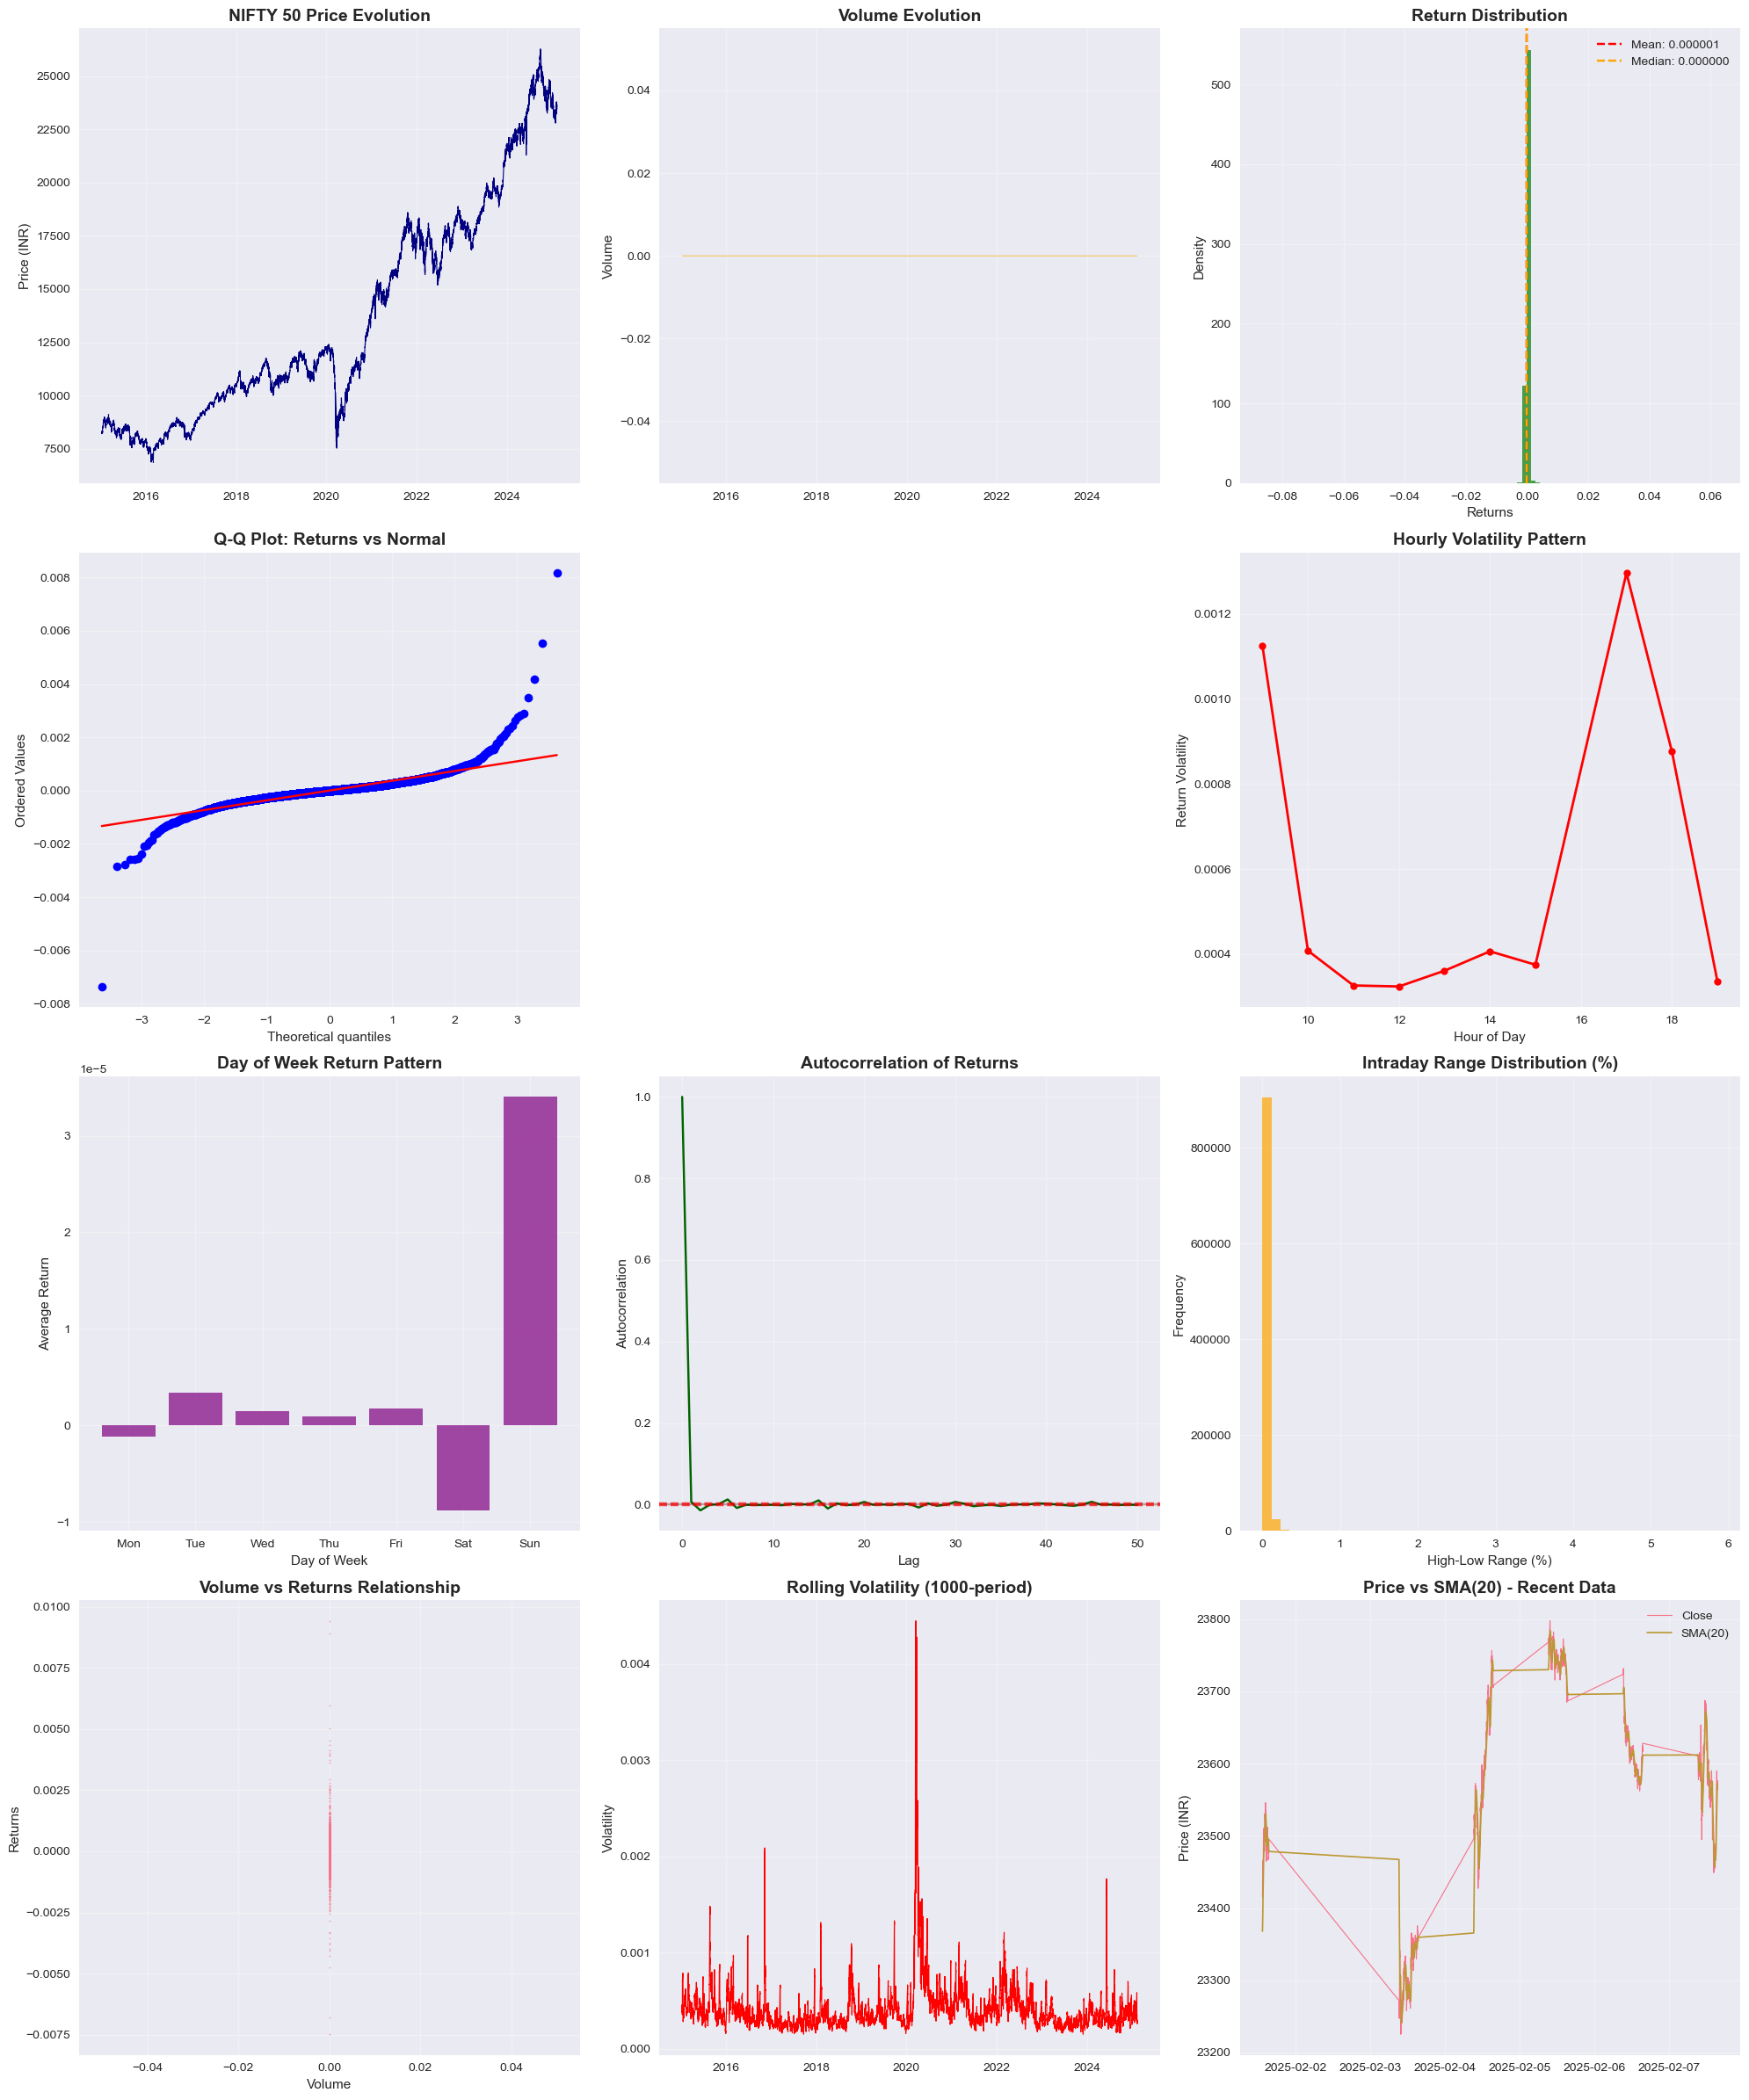


4. ADDITIONAL STATISTICAL TESTS
------------------------------
ARCH test p-value: 0.0000
Returns exhibit ARCH effects (volatility clustering)


In [483]:
eda=backtester.exploratory_data_analysis()

| Metric                   | Value     | Interpretation                                                                                                                 |
| ------------------------ | --------- | ------------------------------------------------------------------------------------------------------------------------------ |
| **Mean Return**          | 0.000001  | Indicates that the average return per time interval is approximately zero. Very close to 0 implies little to no drift.         |
| **Standard Deviation**   | 0.000521  | Measures the volatility of returns. A small value suggests low variability.                                                    |
| **Skewness**             | -12.2238  | Highly negative skew indicates the return distribution has a long left tail — large losses are more probable than large gains. |
| **Kurtosis**             | 2800.8238 | Extremely high kurtosis implies very fat tails — presence of extreme outliers and large moves.                                 |
| **Shapiro-Wilk p-value** | 0.00e+00  | A p-value close to 0 strongly rejects the null hypothesis of normality. The returns are **not normally distributed**.          |


# SMA MOELING(Feature extraction)

In [484]:
df=backtester.feature_engineering()


5. FEATURE ENGINEERING
------------------------------
 Features created for 6 SMA periods
Total features: 51


In [486]:
df.sample(2)

,Open,High,Low,Close,volume,hour,minute,day_of_week,time_of_day,returns,...,SMA_20_above_SMA_50,SMA_50_above_SMA_100,SMA_100_above_SMA_200,rsi,bb_upper,bb_lower,momentum_5,momentum_20,volume_sma_20,volume_ratio
DateTime,,,,,,,,,,,,,,,,,,,,,
2019-05-10 10:55:00,11313.50,11313.70,11311.7,11313.35,0,10,55,4,100,-0.000035,...,1,0,1,57.654076,11316.968977,11298.901023,0.000168,0.001549,0.0,NaN
2024-08-05 14:07:00,24094.35,24096.25,24085.0,24093.10,0,14,7,0,292,-0.000139,...,1,1,0,46.161275,24125.774773,24088.960227,-0.000674,-0.000531,0.0,NaN


In [487]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 932946 entries, 2015-01-09 09:15:00 to 2025-02-07 15:29:00
Data columns (total 51 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Open                   932946 non-null  float64
 1   High                   932946 non-null  float64
 2   Low                    932946 non-null  float64
 3   Close                  932946 non-null  float64
 4   volume                 932946 non-null  int64  
 5   hour                   932946 non-null  int32  
 6   minute                 932946 non-null  int32  
 7   day_of_week            932946 non-null  int32  
 8   time_of_day            932946 non-null  int32  
 9   returns                932945 non-null  float64
 10  log_returns            932945 non-null  float64
 11  volatility_5           932941 non-null  float64
 12  volatility_20          932926 non-null  float64
 13  high_low_ratio         932946 non-null  float64
 14  op

# single sma base trading stergy
# Generates signals:

1 (long position) when price is above SMA

0 (flat) when price is below SMA

Identifies entries (buy) and exits (sell) by checking signal changes:

+1 → Enter long

-1 → Exit

In [488]:
backtester.backtest_single_sma(20)

{'SMA_Period': 20,
 'Total_Return': -0.9999991682094783,
 'Annualized_Return': -0.7550751158518486,
 'Volatility': 0.11776566802408764,
 'Sharpe_Ratio': -6.411674374380541,
 'Max_Drawdown': -0.9999991791513952,
 'Win_Rate': 0.444416230386043,
 'Profit_Factor': 0.8123597204336325,
 'Calmar_Ratio': -0.7550757356547128,
 'Sortino_Ratio': -5.672146682548202,
 'Num_Trades': 55084,
 'Avg_Trade': -2.6009322259286342e-05,
 'Best_Trade': 0.051108797705800235,
 'Worst_Trade': -0.07711261415376937,
 'Time_in_Market': 0.5188939124022184}

In [489]:
backtester.run_backtest()


6. RUNNING SMA BACKTESTS
------------------------------
Backtesting SMA(5)...
Backtesting SMA(10)...
Backtesting SMA(20)...
Backtesting SMA(50)...
Backtesting SMA(100)...
Backtesting SMA(200)...
Backtest complete!
Best performing SMA: 200 (Sharpe: -2.171)


,SMA_Period,Total_Return,Annualized_Return,Volatility,Sharpe_Ratio,Max_Drawdown,Win_Rate,Profit_Factor,Calmar_Ratio,Sortino_Ratio,Num_Trades,Avg_Trade,Best_Trade,Worst_Trade,Time_in_Market
0,5,-1.000000,-0.957736,0.123253,-7.770474,-1.000000,0.399487,0.660896,-0.957736,-7.358087,119967,-0.000053,0.051109,-0.086623,0.508610
1,10,-1.000000,-0.876900,0.120641,-7.268700,-1.000000,0.425627,0.744191,-0.876900,-6.656051,80244,-0.000037,0.062220,-0.077113,0.513906
2,20,-0.999999,-0.755075,0.117766,-6.411674,-0.999999,0.444416,0.812360,-0.755076,-5.672147,55084,-0.000026,0.051109,-0.077113,0.518894
3,50,-0.999789,-0.572797,0.117841,-4.860749,-0.999795,0.464197,0.877250,-0.572914,-3.938027,33533,-0.000016,0.040813,-0.086623,0.525679
4,100,-0.994576,-0.407999,0.111486,-3.659650,-0.994758,0.475759,0.920544,-0.410149,-3.062511,23042,-0.000010,0.040813,-0.086623,0.528270
5,200,-0.936056,-0.241427,0.111216,-2.170806,-0.939083,0.485835,0.957077,-0.257089,-1.776606,15055,-0.000005,0.039158,-0.086623,0.535788



7. CREATING PERFORMANCE VISUALIZATIONS
------------------------------


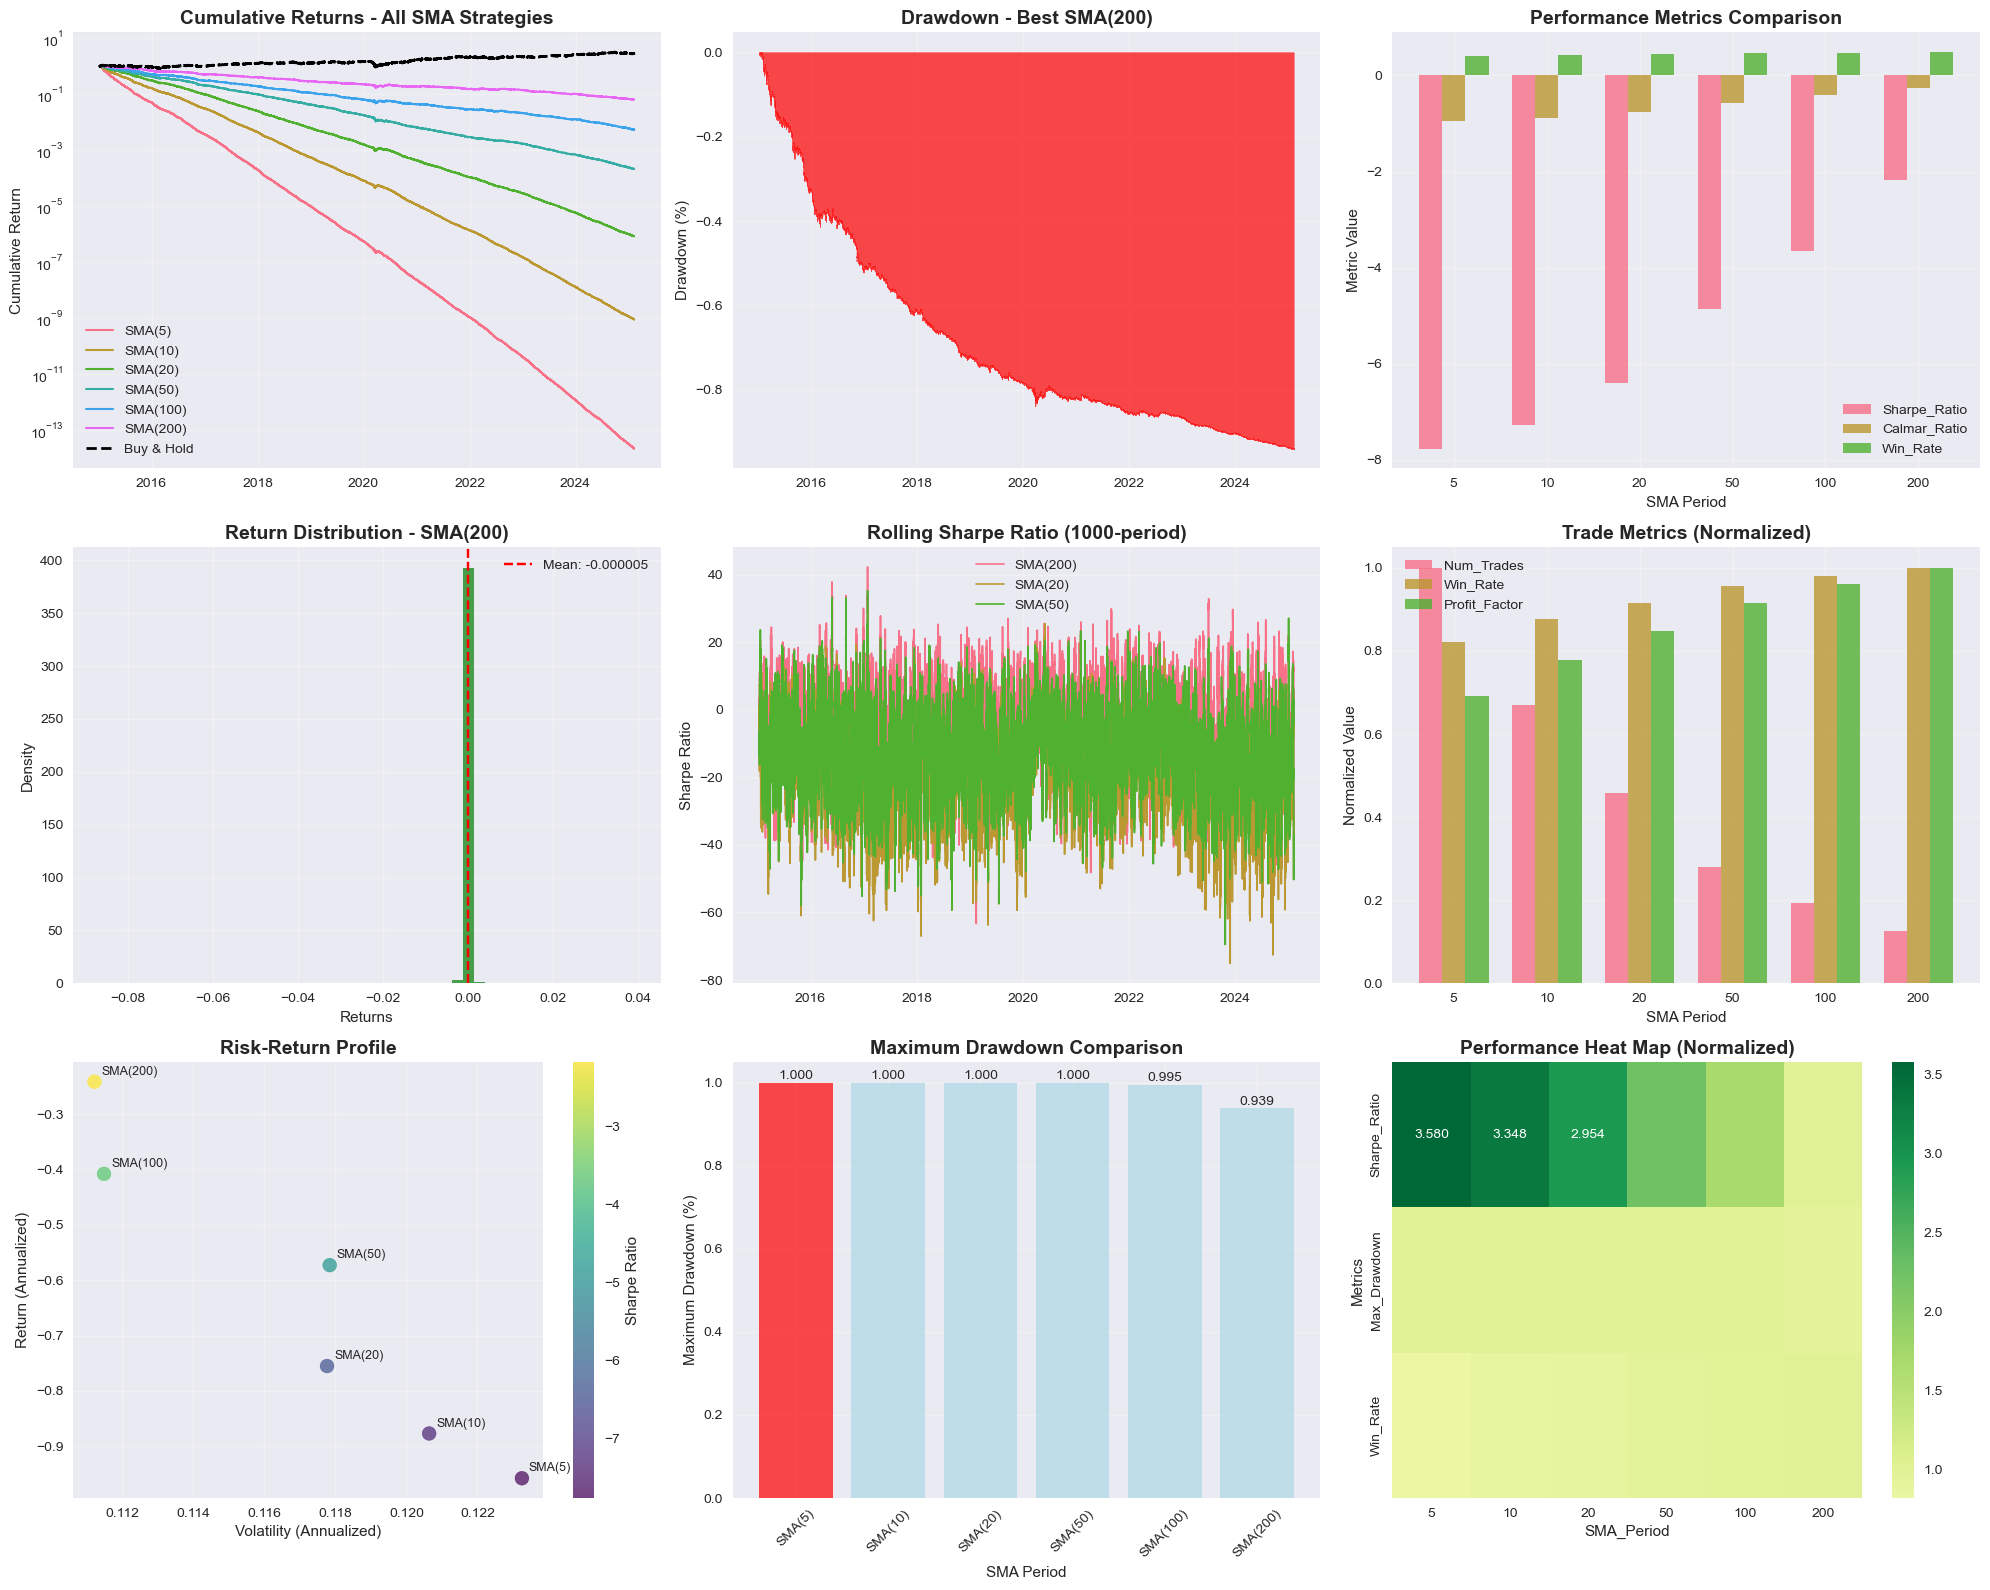

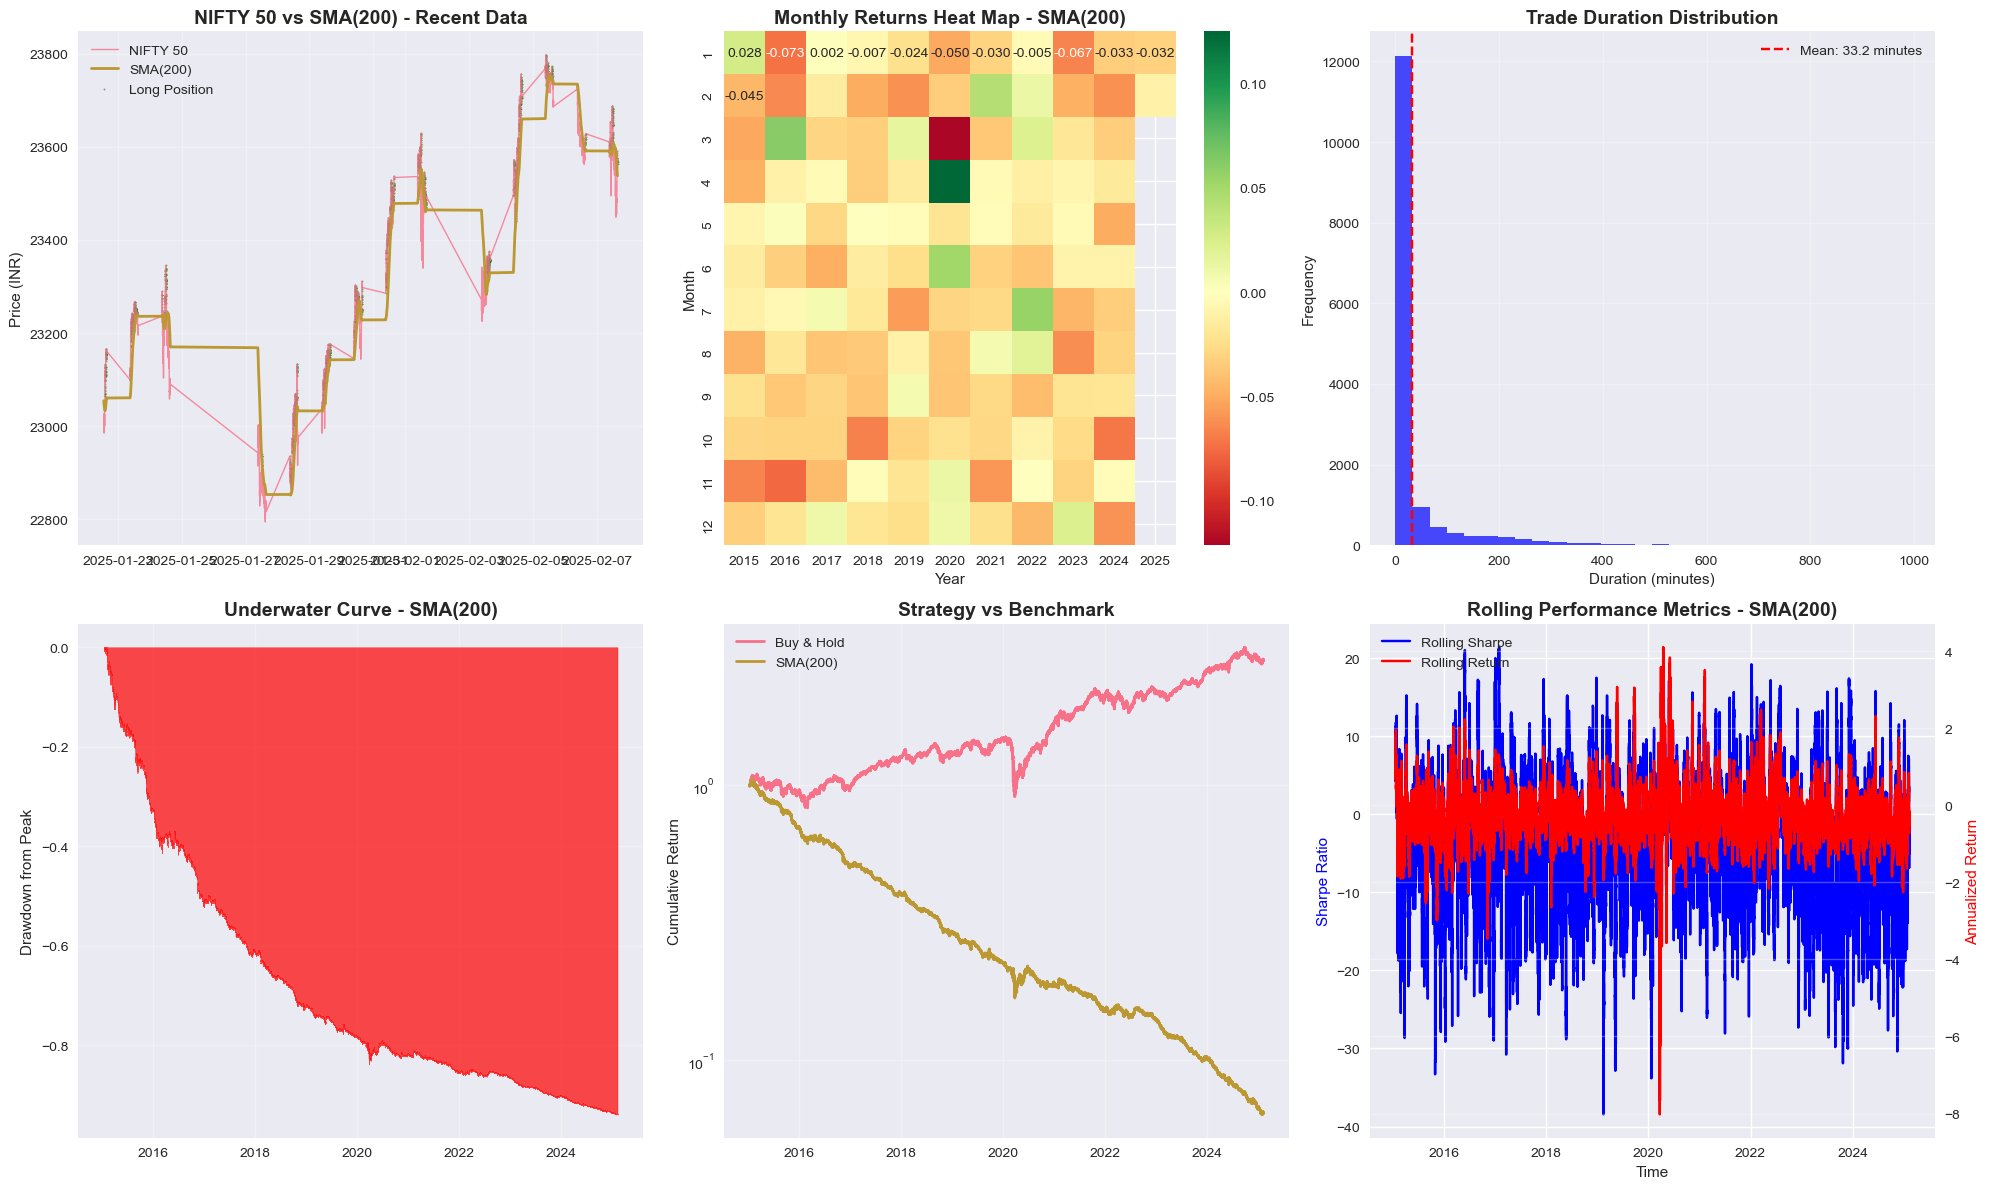

In [490]:
backtester.create_performance_visualizations()


8. STATISTICAL ANALYSIS - BEST SMA(200)
--------------------------------------------------
RETURN STATISTICS:
Mean return: -0.000005 (-49.31% annualized)
Median return: -0.000010
Standard deviation: 0.000491 (15.03% annualized)
Skewness: -17.0457
Kurtosis: 3248.3078
Minimum return: -0.086623 (-8.662%)
Maximum return: 0.039158 (3.916%)

PERCENTILES:
 1th percentile: -0.000981 (-0.098%)
 5th percentile: -0.000510 (-0.051%)
10th percentile: -0.000351 (-0.035%)
25th percentile: -0.000154 (-0.015%)
50th percentile: -0.000010 (-0.001%)
75th percentile: 0.000151 (0.015%)
90th percentile: 0.000339 (0.034%)
95th percentile: 0.000498 (0.050%)
99th percentile: 0.000988 (0.099%)

STATISTICAL TESTS:
Shapiro-Wilk test: statistic=0.7580, p-value=0.00e+00
Returns are NOT normally distributed
Jarque-Bera test: statistic=224686034105.2127, p-value=0.00e+00
T-test (mean=0): statistic=-7.6613, p-value=1.84e-14
Mean return is significantly different from 0


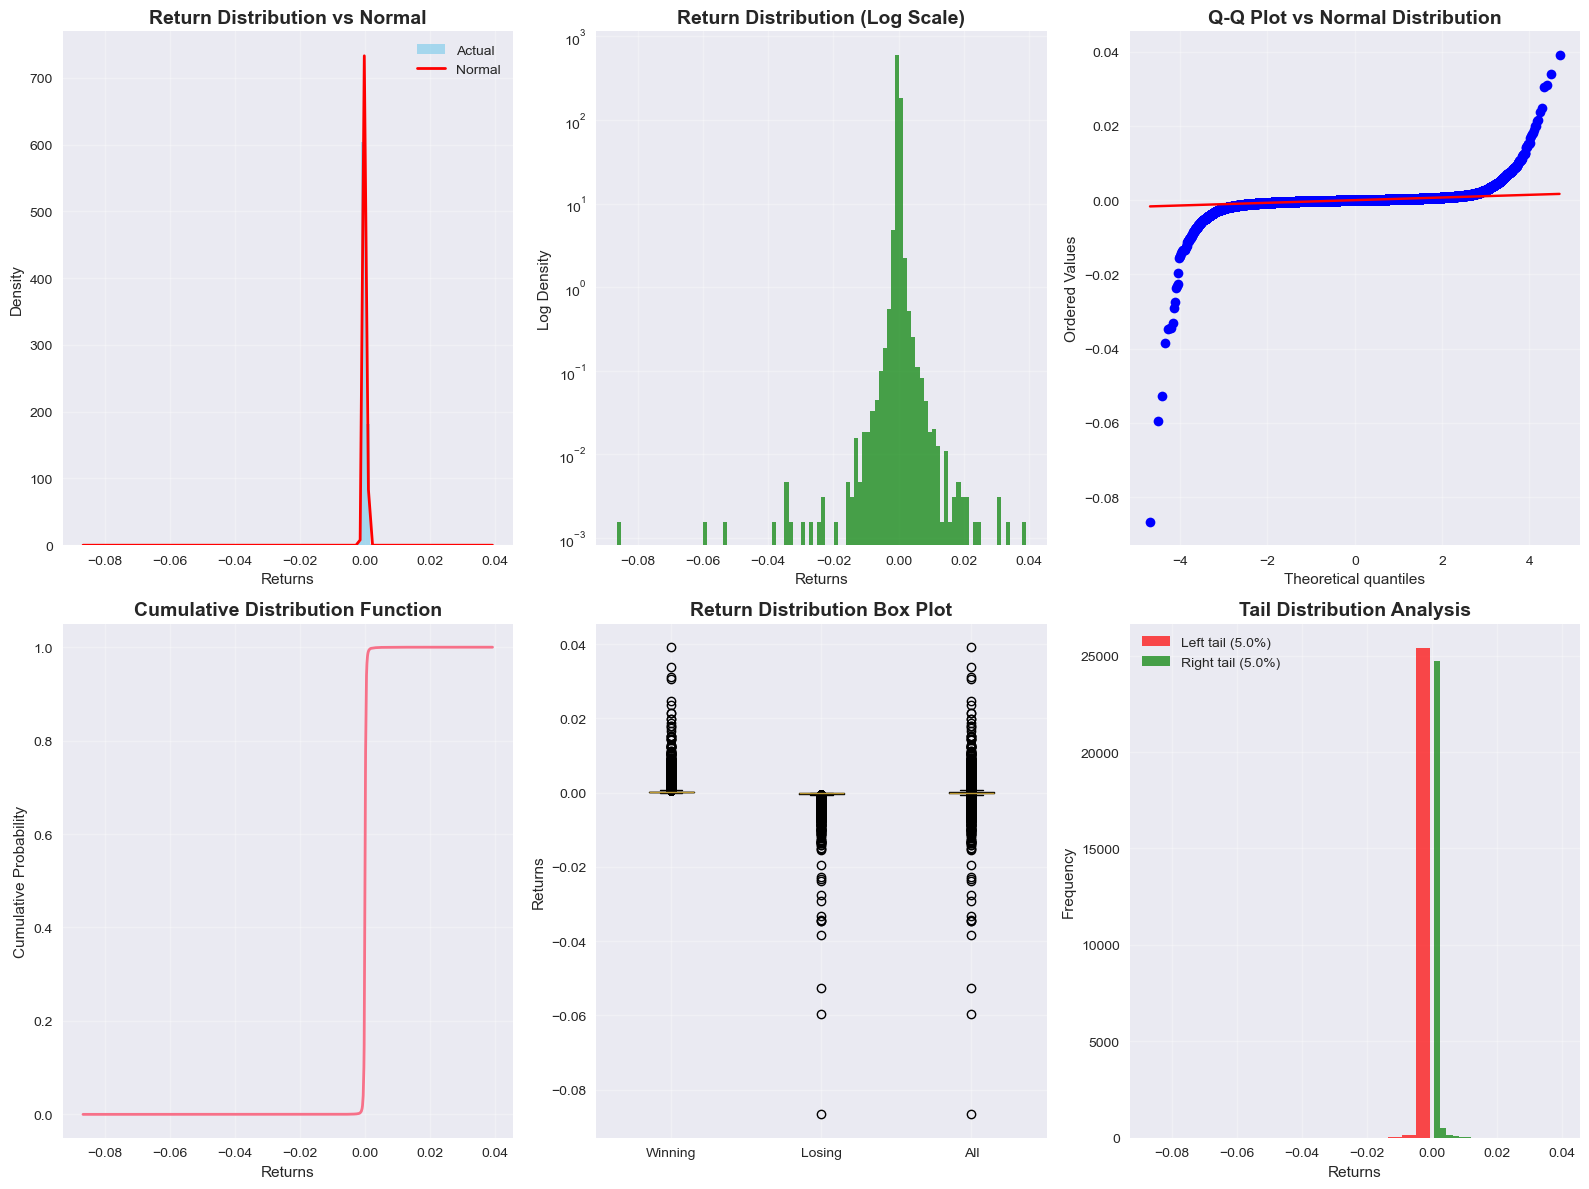


TAIL ANALYSIS:
Left tail (bottom 5%) statistics:
  Mean: -0.000894
  Std: 0.001187
  Count: 25551
  Contribution to total return: -22.833815
Right tail (top 5%) statistics:
  Mean: 0.000912
  Std: 0.001005
  Count: 25551
  Contribution to total return: 23.293633

WIN/LOSS PATTERN ANALYSIS:
------------------------------
Winning trades: 248264 (48.6%)
Losing trades: 262741 (51.4%)
Neutral trades: 0

WINNING TRADES:
  Average: 0.000241 (0.024%)
  Median: 0.000156
  Best: 0.039158 (3.916%)
  Total contribution: 59.932293

LOSING TRADES:
  Average: -0.000238 (-0.024%)
  Median: -0.000150
  Worst: -0.086623 (-8.662%)
  Total contribution: -62.620118

STREAK ANALYSIS:
Win streaks - Max: 16, Avg: 2.0
Loss streaks - Max: 29, Avg: 2.1

MARKET REGIME ANALYSIS:
------------------------------
LOW VOLATILITY REGIME:
  Mean return: -0.000005
  Sharpe ratio: -9.969
  Win rate: 0.295

MEDIUM VOLATILITY REGIME:
  Mean return: -0.000003
  Sharpe ratio: -4.085
  Win rate: 0.256

HIGH VOLATILITY REGIME:


In [491]:
backtester.statistical_analysis_best_sma()

### A thorough analysis of the single SMA strategies on minute-wise NIFTY 50 data demonstrates that none of the single SMAs deliver robust performance over the studied decade. Metrics such as cumulative return, Sharpe ratio, and win rate for most single SMA strategies are notably weak or even negative.
### 
Specifically, while SMA(200) does outperform other SMAs in relative terms—showing the “least bad” performance—its own Sharpe ratio is still negative and overall returns remain poor. This is visually clear in the "Cumulative Returns - All SMA Strategies" and "Rolling Sharpe Ratio" panels.

Key points:

# dual SMA Crossover (main)

In [492]:
backtester.comprehensive_dual_sma_crossover_analysis()


 COMPREHENSIVE DUAL SMA CROSSOVER ANALYSIS
Testing 13 dual SMA combinations...
  → Analyzing 5/20 combination... (1/13)
  → Analyzing 5/50 combination... (2/13)
  → Analyzing 5/100 combination... (3/13)
  → Analyzing 5/200 combination... (4/13)
  → Analyzing 10/20 combination... (5/13)
  → Analyzing 10/50 combination... (6/13)
  → Analyzing 10/100 combination... (7/13)
  → Analyzing 10/200 combination... (8/13)
  → Analyzing 20/50 combination... (9/13)
  → Analyzing 20/100 combination... (10/13)
  → Analyzing 20/200 combination... (11/13)
  → Analyzing 50/100 combination... (12/13)
  → Analyzing 50/200 combination... (13/13)

 Analysis complete! Best strategy: 50/200
   Sharpe Ratio: 1.054
   Total Return: 191.54%


,Fast_SMA,Slow_SMA,Strategy,Total_Return,Annualized_Return,Volatility,Sharpe_Ratio,Calmar_Ratio,Sortino_Ratio,Max_Drawdown,Avg_Drawdown,Win_Rate,Trade_Count,Avg_Win,Avg_Loss,Profit_Factor,Trade_Skew,Trade_Kurt,Shapiro_P,JB_P
12,50,200,50/200,1.915402,0.113517,0.107520,1.054110,10.679741,0.856829,-0.179349,-0.026362,0.120620,5480,0.000272,-0.000247,0.151436,-20.375597,784.316333,0.0,0.0
10,20,200,20/200,0.803929,0.061077,0.108931,0.599059,3.822424,0.478070,-0.210319,-0.040515,0.109571,7721,0.000276,-0.000286,0.118656,-26.153717,873.080916,0.0,0.0
11,50,100,50/100,0.044053,0.004341,0.108328,0.094504,0.126037,0.075455,-0.349524,-0.128323,0.115111,10251,0.000244,-0.000234,0.135858,-8.665094,245.630780,0.0,0.0
7,10,200,10/200,-0.063479,-0.006569,0.108997,-0.005608,-0.151880,-0.004483,-0.417957,-0.154512,0.087721,10465,0.000240,-0.000318,0.072472,-39.467994,2042.154000,0.0,0.0
9,20,100,20/100,-0.202133,-0.022436,0.107631,-0.156671,-0.471355,-0.126440,-0.428833,-0.218288,0.109632,12469,0.000262,-0.000262,0.123302,-16.873120,502.798467,0.0,0.0
3,5,200,5/200,-0.474503,-0.062609,0.109593,-0.534803,-0.842646,-0.429059,-0.563110,-0.347492,0.065527,14391,0.000228,-0.000347,0.046077,-32.889110,1492.366963,0.0,0.0
6,10,100,10/100,-0.585449,-0.084684,0.108619,-0.760023,-0.970001,-0.623635,-0.603554,-0.420969,0.085576,16313,0.000213,-0.000288,0.069267,-34.857105,1760.669303,0.0,0.0
8,20,50,20/50,-0.858831,-0.178592,0.110492,-1.724808,-0.989813,-1.360090,-0.867670,-0.623173,0.104619,21067,0.000236,-0.000248,0.111250,-21.981802,822.533406,0.0,0.0
2,5,100,5/100,-0.855816,-0.176846,0.108997,-1.730662,-0.991134,-1.430421,-0.863471,-0.614389,0.064882,22225,0.000201,-0.000312,0.044558,-43.072663,2611.400503,0.0,0.0
5,10,50,10/50,-0.932334,-0.237103,0.113397,-2.329333,-0.996496,-1.810830,-0.935612,-0.701834,0.085487,25267,0.000208,-0.000288,0.067598,-48.074733,2957.535925,0.0,0.0



 Creating Comprehensive Dual SMA Dashboard...


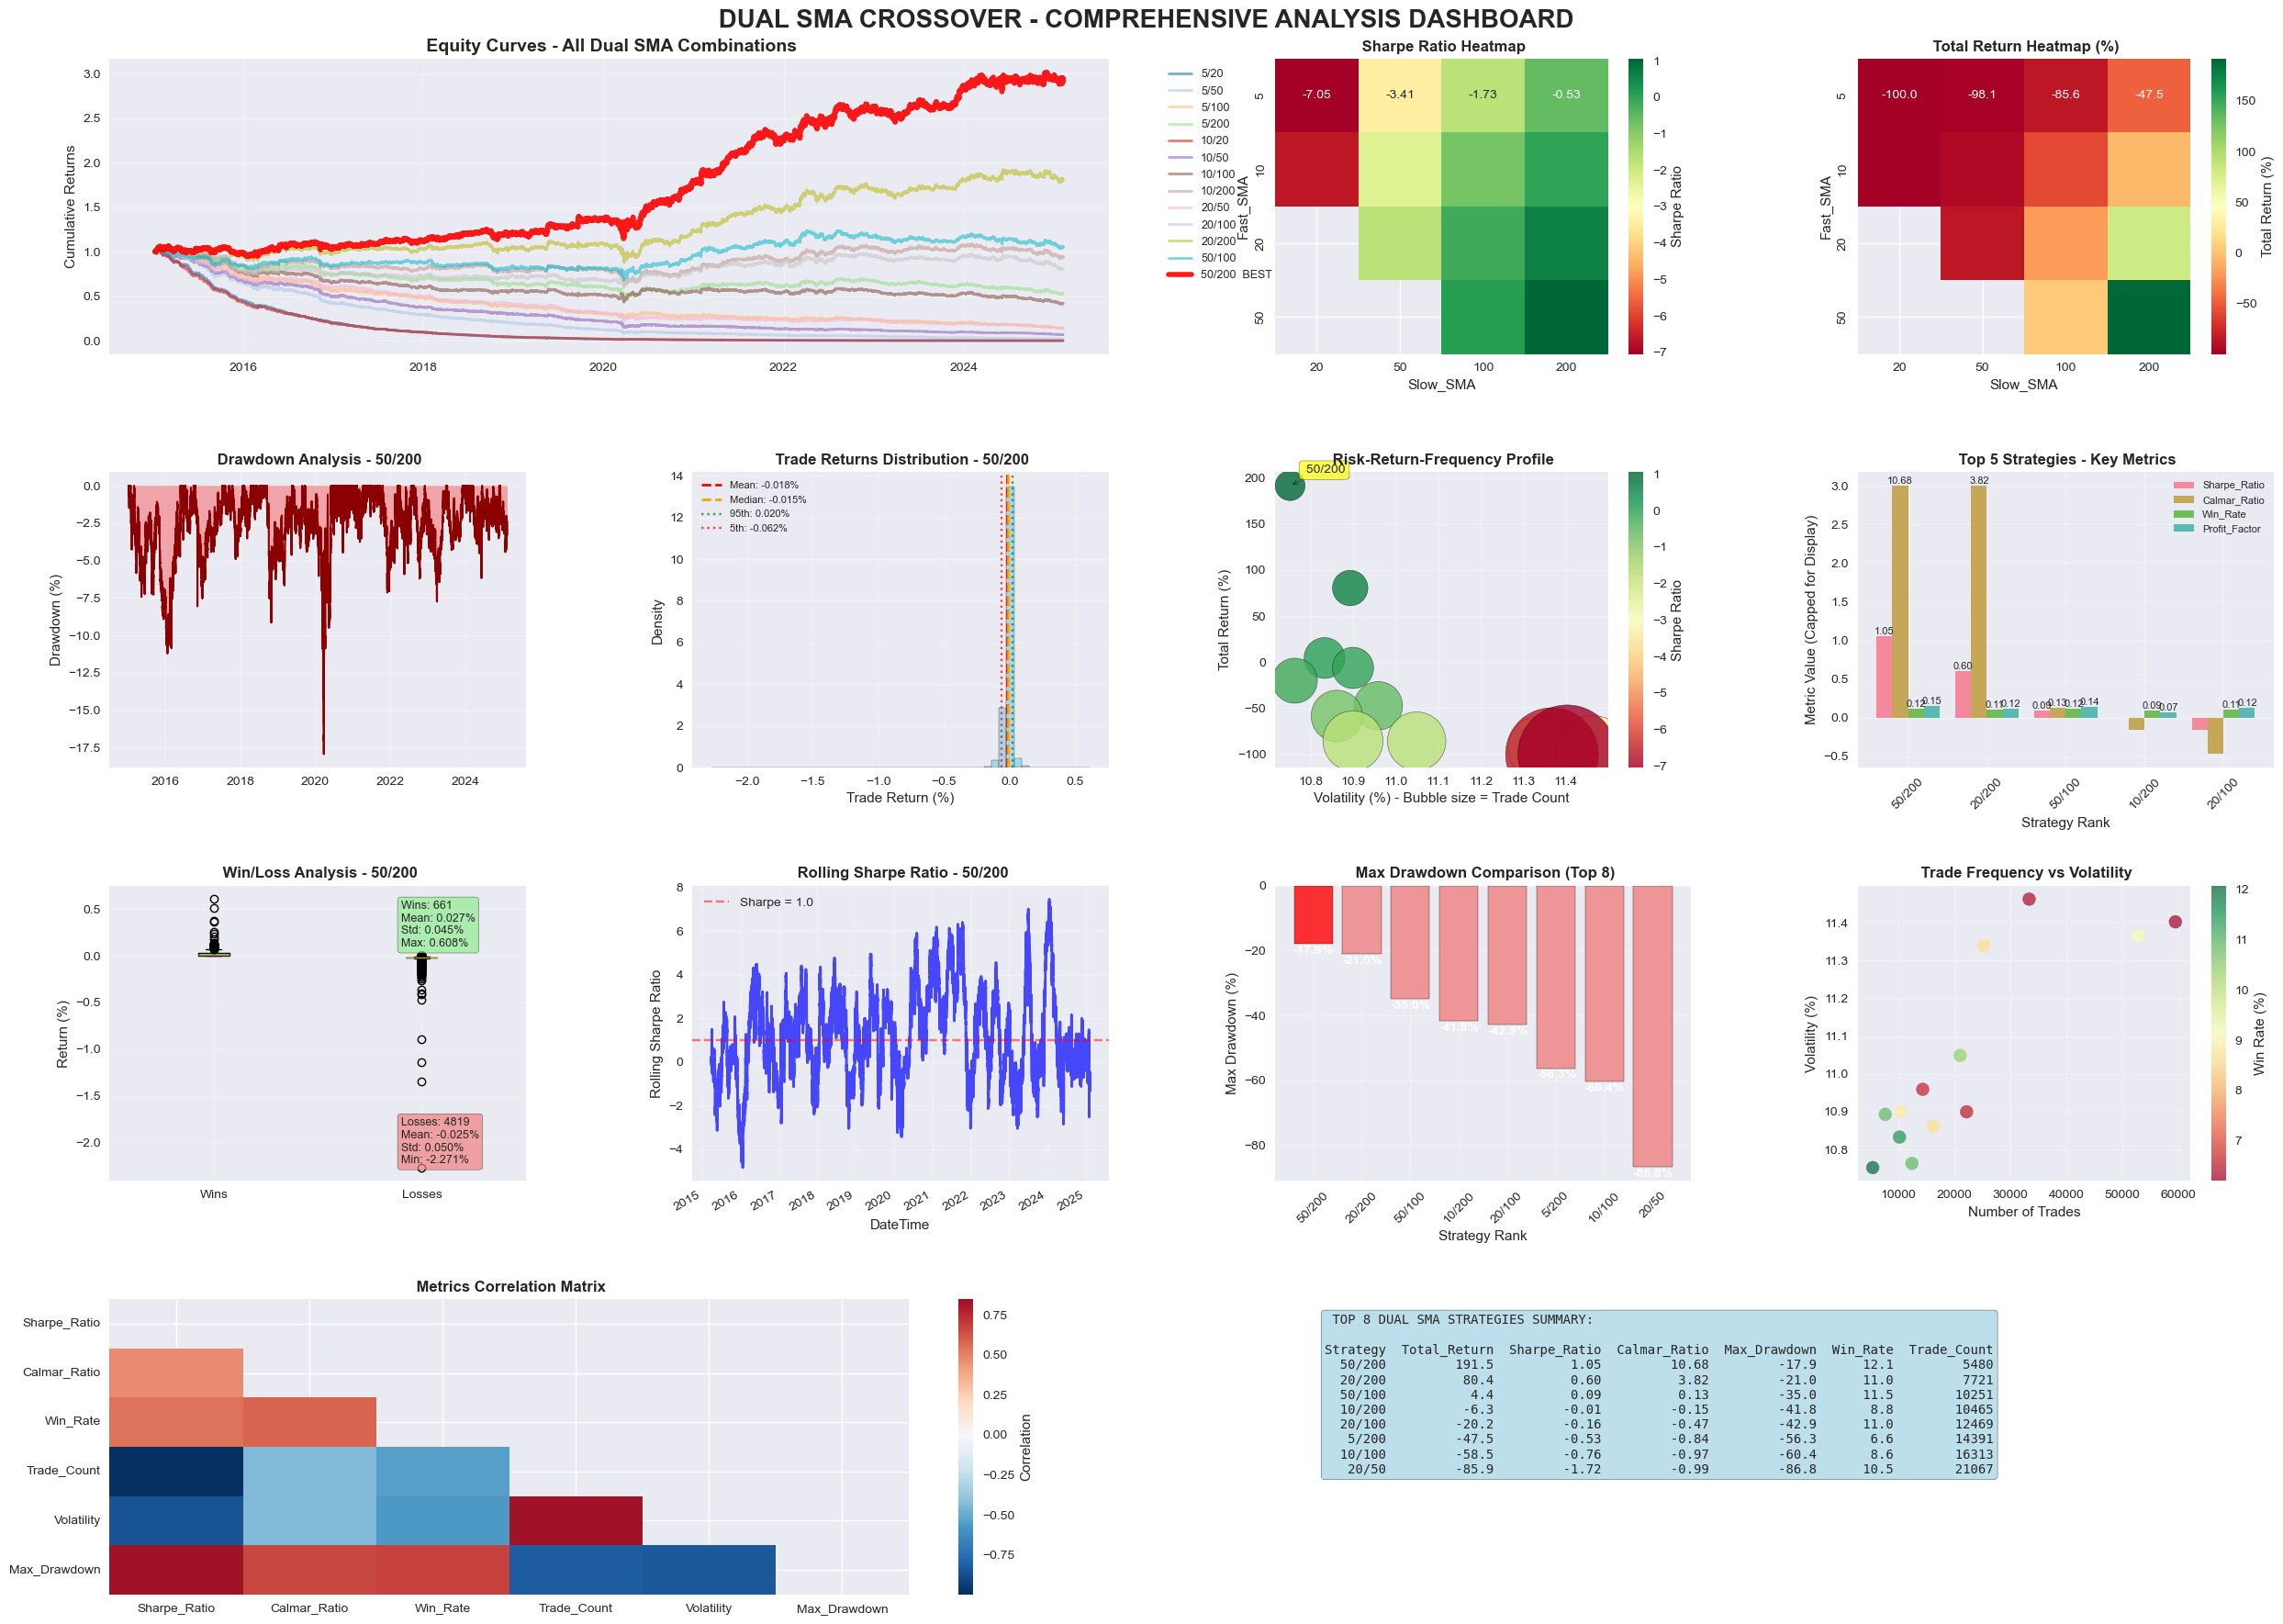

 Comprehensive Dual SMA Dashboard created successfully!


In [493]:
backtester.create_dual_sma_comprehensive_dashboard()

In [494]:
backtester.create_detailed_dual_sma_statistics()


 DETAILED DUAL SMA STATISTICAL ANALYSIS & INSIGHTS

 TOP 10 DUAL SMA COMBINATIONS (Ranked by Sharpe Ratio):
----------------------------------------------------------------------------------------------------
Strategy  Total_Return  Annualized_Return  Sharpe_Ratio  Calmar_Ratio  Max_Drawdown  Win_Rate  Trade_Count  Profit_Factor
  50/200        191.54              11.35         1.054        10.680        -17.93     12.06         5480          0.151
  20/200         80.39               6.11         0.599         3.822        -21.03     10.96         7721          0.119
  50/100          4.41               0.43         0.095         0.126        -34.95     11.51        10251          0.136
  10/200         -6.35              -0.66        -0.006        -0.152        -41.80      8.77        10465          0.072
  20/100        -20.21              -2.24        -0.157        -0.471        -42.88     10.96        12469          0.123
   5/200        -47.45              -6.26        -0.535   

(Fast_SMA                     50
 Slow_SMA                    200
 Strategy                 50/200
 Total_Return           1.915402
 Annualized_Return      0.113517
 Volatility              0.10752
 Sharpe_Ratio            1.05411
 Calmar_Ratio          10.679741
 Sortino_Ratio          0.856829
 Max_Drawdown          -0.179349
 Avg_Drawdown          -0.026362
 Win_Rate                0.12062
 Trade_Count                5480
 Avg_Win                0.000272
 Avg_Loss              -0.000247
 Profit_Factor          0.151436
 Trade_Skew           -20.375597
 Trade_Kurt           784.316333
 Shapiro_P                   0.0
 JB_P                        0.0
 Name: 12, dtype: object,
 DateTime
 2015-01-09 14:49:00   -0.000150
 2015-01-12 12:22:00   -0.000186
 2015-01-12 14:02:00   -0.000150
 2015-01-13 11:59:00   -0.000222
 2015-01-13 12:22:00   -0.000150
                          ...   
 2025-02-05 14:52:00   -0.000359
 2025-02-06 15:26:00   -0.000150
 2025-02-07 10:27:00   -0.001406
 2025-0

In [495]:
backtester.advanced_dual_sma_insights()


 ADVANCED DUAL SMA INSIGHTS

 FAST SMA PERIOD ANALYSIS:
          Sharpe_Ratio  Total_Return  Win_Rate
Fast_SMA                                      
5               -3.181        -0.828     0.064
10              -2.428        -0.645     0.088
20              -0.427        -0.086     0.108
50               0.574         0.980     0.118

 SLOW SMA PERIOD ANALYSIS:
          Sharpe_Ratio  Total_Return  Win_Rate
Slow_SMA                                      
20              -6.832        -1.000     0.077
50              -2.488        -0.924     0.084
100             -0.638        -0.400     0.094
200              0.278         0.545     0.096

 OPTIMAL PERIODS:
├─ Best Fast SMA Period: 50
└─ Best Slow SMA Period: 200


(          Sharpe_Ratio  Total_Return  Win_Rate
 Fast_SMA                                      
 5               -3.181        -0.828     0.064
 10              -2.428        -0.645     0.088
 20              -0.427        -0.086     0.108
 50               0.574         0.980     0.118,
           Sharpe_Ratio  Total_Return  Win_Rate
 Slow_SMA                                      
 20              -6.832        -1.000     0.077
 50              -2.488        -0.924     0.084
 100             -0.638        -0.400     0.094
 200              0.278         0.545     0.096)

# best is 50-200 SMA 